:#Predicting Hospital Readmission of Diabetic Patients

Group name: Biohealth Squad

## Group members & Contribution:

|Name | ID | Contirbution |
|-----|-----|-----|
|Boaz Chung Yi Heng |23059592|CRISP-DM, Data Preparation|
|Yong Ting Kang 		|23083416|Data Preparation, EDA|
|Low Zi Yang			  |23086487|Feature Selection|
|Sim Jin Xiang 			|23072236|Modeling|
|Kevin Wong Xin Kai |17083819|Result Evaluation & Interpretation|


# 1.0 CRISP-DM

## 1.1 Business Understanding

###1.1.1 Background

Diabetes prevalence is expected to double from 529 million to 1.3 billion by 2050, with diabetic patients experiencing a higher 30-day readmission rate (24.3%) (Ong et al., 2023; Ostling et al., 2017).

The 30-day period is an important risk indicator for US hospitals as excessive readmissions lead to financial penalities under the Hospital Readmissions Reduction Program (HRRP) by CMS (James et al., 2023). The annual cost of readmissions within 30 days of discharge in the US is estimated to be \$20 to \$25 billion (Rubin & Shah, 2021).

Furthermore, patients view readmissions as a failure of the healthcare system caused by inadequate support, which tarnishes hospital reputation and potentially leads to litigation.

Hence, it is important to understand the factors that influence hospital readmissions within 30 days after discharge for diabetic patients so that proper resource optimization strategies and interventions can be implemented.


###1.1.2 Objectives

The primary business and data mining objectives are listed below.

Aspect  | Objective
-------------------|------------------
Business       | To reduce the number of readmissions of diabetic patients within 30 days in U.S. hospitals
Data Mining       | To predict whether a diabetic patient would be readmitted within 30 days based on demographic and medical information using a classification model

###1.1.3 Situation Assessment

Based on the key resources needed, the requirements and risks associated with each resource is identified.

Resources  | Requirements | Risks
-------------------|----------------------|-------
Data       | Patients’ consent is required for HIPAA Compliance         | - Data breach <br> - Incomplete data
Personnel       | Data scientists need to have both technical skills and domain knowledge to understand and interpret results          | Misalignment in project objectives
Computing       | The computing system needs to be robust enough to handle patient data yet within the project budget         | - Budget overrun <br> - System incompatibility

###1.1.4 Project Plan

The project plan is formulated in the table below according to the CRISP-DM framework.

Phase  | Time (Weeks)
-------------------|------------------
Business understanding|<center>2
Data understanding|<center>2
Data preparation|<center>5
Modeling|<center>2
Evaluation|<center>1
Deployment|<center>1

## 1.2 Data Understanding

### 1.2.1 Initial Data Collection

In this project, the dataset for predicting hospital readmission of diabetics was sourced from the Center for Machine Learning and Intelligent Systems at the University of California, Irvine (UCI). The data was collected from 130 hospitals in the United States for 10 years (1999-2008).

### 1.2.2 Data Description

There are a total of 101,766 attributes and 50 features in the dataset. The data consists of 37 factor types of attributes and 13 numeric types of attributes. These include demographic information, patient history, admission details, and medications prescribed and readmission history.

The complete list of features and their descriptions is available in the [dataset repository](https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008)



### 1.2.3 Data Exploration

Exploratory Data Analysis (EDA) was performed to gain an understanding of the data via visualisations and summary statistics. The detailed steps and insights gained are recorded in [Section 3.0](https://colab.research.google.com/drive/1wG5XaTWOL76BMk7TDU7NaLk9wkQSiNZv#scrollTo=-5k-jj5ofBIu).

## 1.3 Data Preparation

The data preprocessing steps involved data cleaning , and initial feature selection and data transformation.

Data types, missing values, duplicates, and outliers were dealt with under the data cleaning stage. Next, an initial feature selection was  performed to remove non-meaningful features. Finally, recoding, categorization and encoding were performed under the data transformation step.

Before the modeling stage, feature selection was performed using BORUTA to identify features with high importance.

The detailed code and explanations will follow in [Section 2.0](https://colab.research.google.com/drive/1wG5XaTWOL76BMk7TDU7NaLk9wkQSiNZv#scrollTo=_6XowyOeU-cx) section.

## 1.4 Modeling

GBM algorithms are a popular choice for many machine learning tasks due to their high predictive accuracy, robustness, efficiency, and ease of use. Hence, XGBoost, CatBoost, and LightGBM are employed in our project.

To reduce the bias associated with the random sampling of the training, K-fold Cross-Validation will be employed as part of the test design.

Hyperparameter optimizsation will be performed to fine tune the model performances before they are compared based on various performance metrics.

The detailed steps, code, and results are explained in [Section 4.0](https://colab.research.google.com/drive/1wG5XaTWOL76BMk7TDU7NaLk9wkQSiNZv#scrollTo=3IuX39czqShj).

## 1.5 Evaluation

Based on the modeling results, the best model is identified. Subsequently, the results are assessed and interpreted with respect to business success criteria. The process is reviewed before next steps are determined.

The detailed results are explained in [Section 5.0](https://colab.research.google.com/drive/1wG5XaTWOL76BMk7TDU7NaLk9wkQSiNZv#scrollTo=1dSN9Y2P1ZXh).

## 1.6 Deployment

The steps and code employed in this work are documented in a final report (i.e., this IPython notebook). A final presentation was also given as the outcome of this project.

While deployment of the model is not required the WQD7003 assignment, several ideas for deployment have been listed below.

* Website: Easy access for healthcare personnel to assess patient's risk of readmission
* Integration with Patient Health App: High-risk patients can take an active role in receiving education, support, and resources to self-monitor their health.
* Integration into Management Operation System: To optimize resource allocation for targeted interventions to prevent avoidable readmissions and improve care delivery

Future works would include the formulation of a deployment plan can be available for real-world use. Additionally, a monitoring & maintenance plan would help to ensure the deployed product operates smoothly and the insights from the model remain consistently relevant.

# 2.0 Data Preprocessing



## 2.1 Loading Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [3]:
# Read file
# If this does not work, download the csv file from (https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008), upload to Colab and replace the following link with the file name
df = pd.read_csv('https://drive.google.com/uc?id=17skUt4qyW4SFupoYgENiYcqn60aIwt6_')

In [4]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
#Check shape of dataset which contains of 101766 rows of data and 50 features.
df.shape

(101766, 50)

In [7]:
df.dtypes

,0
encounter_id,int64
patient_nbr,int64
race,object
gender,object
age,object
weight,object
admission_type_id,int64
discharge_disposition_id,int64
admission_source_id,int64
time_in_hospital,int64


In [8]:
# Count the data types values
num_types = df.dtypes.value_counts()
print(num_types)

object    37
int64     13
Name: count, dtype: int64


In [9]:
#Check the summary
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


## 2.2 Data Cleaning


### 2.2.1 Correcting Data Types

In [10]:
# Change the integer data types to categorical data type
df['admission_type_id'] = df['admission_type_id'].astype('object')
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype('object')
df['admission_source_id'] = df['admission_source_id'].astype('object')

# Print the updated data types of the columns
print(df.dtypes)

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

### 2.2.2 Handling Missing Value

In the dataset, missing values were annotated with '?' and 'Unknown/Invalid'. These were replaced with NaN for subsequent preprocessing steps.

In [11]:
# Replace'?' and 'Unknown/Invalid' with NaN
df.replace('?',pd.NA,inplace=True)
df.replace('Unknown/Invalid',pd.NA,inplace=True)
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),<NA>,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),<NA>,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),<NA>,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),<NA>,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),<NA>,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),<NA>,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),<NA>,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),<NA>,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),<NA>,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [12]:
#Check sum of null value
df_null_sum = df.isnull().sum()

# Create a list of column names and corresponding sums where sum > 0
columns_with_null = [col for col, null_sum in zip(df_null_sum.index, df_null_sum) if null_sum > 0]
sum_values = [null_sum for null_sum in df_null_sum if null_sum > 0]

df_new = pd.DataFrame({'Column': columns_with_null, 'Sum': sum_values})

print(df_new.sort_values(by='Sum'))

              Column    Sum
1             gender      3
5             diag_1     21
6             diag_2    358
7             diag_3   1423
0               race   2273
3         payer_code  40256
4  medical_specialty  49949
9          A1Cresult  84748
8      max_glu_serum  96420
2             weight  98569


Due to the large proportion of missing values, the following columns were dropped to avoid issues like poor interpretability and predictive generalizability.



*   “Weight” > 90% missing
*   “Payer code”: 40-50% missing
* “Medical specialty”: 40-50% missing

In [13]:
col_to_drop = ['weight', 'payer_code', 'medical_specialty']
df = df.drop(columns = col_to_drop)
df.shape

(101766, 47)

Columns "diag_2" & "diag_3", which contain missing values, were dropped too. This project will focus on using "diag_1", which is the primary diagnosis.


In [14]:
col_to_drop = [ "diag_2", "diag_3"]
df = df.drop(columns = col_to_drop)
df.shape

(101766, 45)

The missing values in the other columns were replaced with appropriate existing labels.

* "race": NaN -> "Other"
* "A1Cresult": NaN -> "None" (meaning not measured)
* "max_glu_serum": NaN -> "None" (meaning not measured)

In [15]:
# Replacing NA values in 'race' with 'Other'
df['race'].replace(pd.NA,'Other',inplace=True)
df['race'].value_counts()

<ipython-input-15-7a0ed74e42fa>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['race'].replace(pd.NA,'Other',inplace=True)


,count
race,
Caucasian,76099
AfricanAmerican,19210
Other,3779
Hispanic,2037
Asian,641


In [16]:
# Replace the NA values with 'None'
df['A1Cresult'] = df['A1Cresult'].replace('', np.nan).fillna('None')
df['max_glu_serum'] = df['max_glu_serum'].replace('', np.nan).fillna('None')

Since there were only 3 rows with missing "gender", these rows were dropped.

In [17]:
# Drop rows with missing gender
df=df.dropna(subset=['gender'])
df.shape

(101763, 45)

Upon checking the number of null values, only column "diag_1" had missing values. These will be addressed in the data transformation section.

In [18]:
#Check sum of null value
df_null_sum = df.isnull().sum()

# Create a list of column names and corresponding sums where sum > 0
columns_with_null = [col for col, null_sum in zip(df_null_sum.index, df_null_sum) if null_sum > 0]
sum_values = [null_sum for null_sum in df_null_sum if null_sum > 0]

df_new = pd.DataFrame({'Column': columns_with_null, 'Sum': sum_values})

print('Columns with Missing Values')
print(df_new.sort_values(by='Sum'))

Columns with Missing Values
   Column  Sum
0  diag_1   21


### 2.2.3 Removing Duplicates

The dataset contained multiple inpatient visits for some patients, which are not statistically independent. Independence of observations is generally assumed for optimal performance, interpretability, and validity. Thus, only  the primary encounter was considered for each patient.

Additionally, the "encounter_id" was removed while the "patient_nbr" was kept. This is because some patients in the dataset may have more than one encounters, but only the patient number is unique.

In [19]:
# Keep only the primary observation (first observation) for each patient
df = df.drop_duplicates(subset='patient_nbr', keep='first')

col_to_drop = ["patient_nbr"]
df = df.drop(columns = col_to_drop)

df.shape

(71515, 44)

In [20]:
col_to_drop = ["encounter_id"]
df = df.drop(columns = col_to_drop)
df.shape

(71515, 43)

### 2.2.4 Identifying and Handling Outliers

Although the box plot shows that there are outliers in the data, removing them based on the IQR method alone is not an ideal action. For instance, all instances where the number of outpatient and emergency visits are > 0 would be removed, so only patients who have never had a hospital visit would remain.

Hence, literature was reviewed to obtained the threshold for removing values. Examples of thresholds obtained from literature are shown below:

* (Soh et al., 2023): Number of readmissions can go up to 12 inpatient readmissions a year in diabetic patients.

* (Ustulin et al., 2018): Frequent ER visits is typically defined as more than 4 times a year in diabetic patients.

* (LaCalle & Rabin, 2010): There are patients who would visit ER more than 20 times a year.

* (Moradi et al., 2017): Although the recommended period is every 3 to 4 months, studies (SA) suggest that that some diabetic patients even visit their doctors every 1 to 2 weeks. Based on the dataset from the reference below, the maximum number ofoutpatient visits for type 2 diabetes patients with a minimum follow up period of three years was 14 visits per year. This is chosen as the threshold.

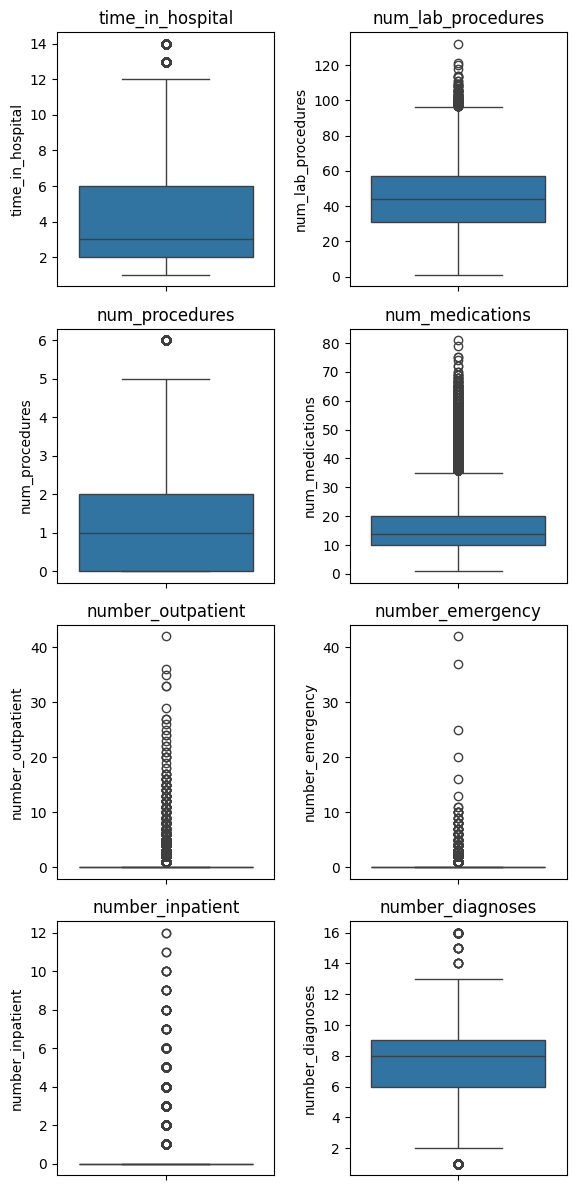

In [21]:
# Select numerical variables
numerical_variables = df.select_dtypes(include=['int64'])

# Define the number of rows and columns for subplots
num_rows = (len(numerical_variables.columns) + 1) // 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(6, 12))

# Flatten axes if needed
if num_rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Create boxplots for each numerical variable
for i, var in enumerate(numerical_variables.columns):
    sns.boxplot(y=var, data=df, ax=axes[i])
    axes[i].set_title(f'{var}')

# Adjust layout
plt.tight_layout()
plt.show()


In [22]:
# Remove rows where 'number_inpatient' is greater than threshold
df = df[df['number_inpatient'] <= 12]

# Remove rows where 'number_emergency' is greater than threshold
df = df[df['number_emergency'] <= 20]

# Remove rows where 'number_outpatient' is greater than threshold
df = df[df['number_outpatient'] <= 14]

## 2.3 Drop Imbalanced Features



Frequency tables are plotted below to understand the distribution of the categorical features. The following features are found to be highly imbalanced, with the majority class accounting for more than 98% of the total instances. Two medications named “Citoglipton” and “Examide” contained the same value in all records.


* citoglipton
* examide
* repaglinide
* nateglinide
* chlorpropamide
* acetohexamide
* tolbutamide
* acarbose
* miglitol
* troglitazone
* tolazamide
* glyburide-metformin
* glipizide-metformin
* glimepiride-pioglitazone
* metformin-rosiglitazone
* metformin-pioglitazone

Features with such imbalances may not contribute meaningful information to the model's predictive power. Additionally, such extreme class imbalance can lead to biased models that perform poorly on minority classes.

Hence, removing these highly imbalanced features can be justified because they provide minimal information for distinguishing between different outcomes. Furthermore, removing them can simplify the model, potentially improving its performance and interpretability.

In [23]:
from tabulate import tabulate

categorical_variables = df.select_dtypes(include=['object', 'category'])

for var in categorical_variables.columns:
  # Frequency table
  freq_table = df[var].value_counts().reset_index()
  freq_table.columns = [var, 'Frequency']

  # Calculate percentage
  total_count = len(df)
  freq_table['Percentage'] = (freq_table['Frequency'] / total_count) * 100

  print(f"\nFrequency Table for {var}:")
  print(tabulate(freq_table, headers='keys', tablefmt='psql'))



Frequency Table for race:
+----+-----------------+-------------+--------------+
|    | race            |   Frequency |   Percentage |
|----+-----------------+-------------+--------------|
|  0 | Caucasian       |       53446 |    74.7852   |
|  1 | AfricanAmerican |       12883 |    18.0268   |
|  2 | Other           |        3123 |     4.36991  |
|  3 | Hispanic        |        1517 |     2.12269  |
|  4 | Asian           |         497 |     0.695436 |
+----+-----------------+-------------+--------------+

Frequency Table for gender:
+----+----------+-------------+--------------+
|    | gender   |   Frequency |   Percentage |
|----+----------+-------------+--------------|
|  0 | Female   |       37990 |      53.1581 |
|  1 | Male     |       33476 |      46.8419 |
+----+----------+-------------+--------------+

Frequency Table for age:
+----+----------+-------------+--------------+
|    | age      |   Frequency |   Percentage |
|----+----------+-------------+--------------|
|  0 | [7

In [24]:
imbalanced_features = ['citoglipton',
                       'examide',
                       'repaglinide',
                       'nateglinide',
                       'chlorpropamide',
                       'acetohexamide',
                       'tolbutamide',
                       'acarbose',
                       'miglitol',
                       'troglitazone',
                       'tolazamide',
                       'glyburide-metformin',
                       'glipizide-metformin',
                       'glimepiride-pioglitazone',
                       'metformin-rosiglitazone',
                       'metformin-pioglitazone']

df = df.drop(columns=imbalanced_features)

## 2.4 Data Transformation

### 2.4.1 Recoding features

#### Discharge Disposition

Since the objective is to predict readmissions, patients who died during  hospital admission were excluded as these patients cannot be readmitted. Encounters with “Discharge disposition” values of 11, 13, 14, 19, 20, or 21 are related to death or hospice.

Also, discharge disposition has 29 unique values. For example, discharged to home, expired, not available, etc. This was recoded to 'Home' and 'Others'.

Text(0.5, 1.0, 'After')

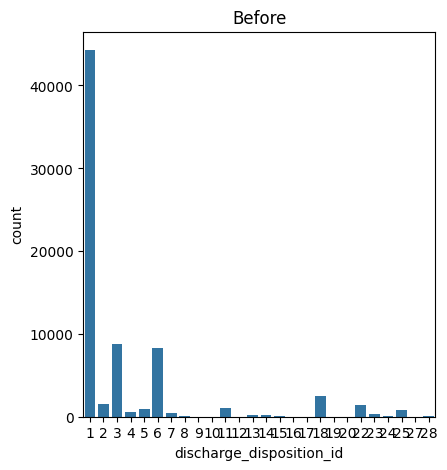

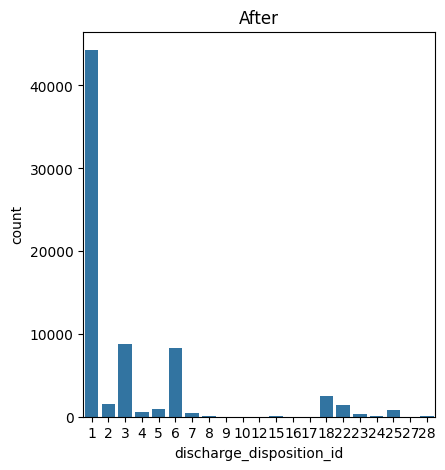

In [25]:
# Plot of discharge disposition before removing patients who died
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='discharge_disposition_id',data=df)
plt.title('Before')

# Remove the values
df = df[~df['discharge_disposition_id'].isin([11,13,14,19,20,21])]

# Plot of discharge disposition after removing patients who died
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
sns.countplot(x='discharge_disposition_id',data=df)
plt.title('After')

In [26]:
# Rename Discharge Disposition

df.rename(columns = {"discharge_disposition_id":"discharge_disposition"},inplace=True)

In [27]:
# Recoding
Home = [1]
Other = list(np.arange(2,29,1))

df['discharge_disposition'].replace(Home,'Home',inplace=True)
df['discharge_disposition'].replace(Other,'Other',inplace=True)


<ipython-input-27-7b119eb119c2>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['discharge_disposition'].replace(Home,'Home',inplace=True)


Text(0.5, 1.0, 'Recoded Discharge Disposition')

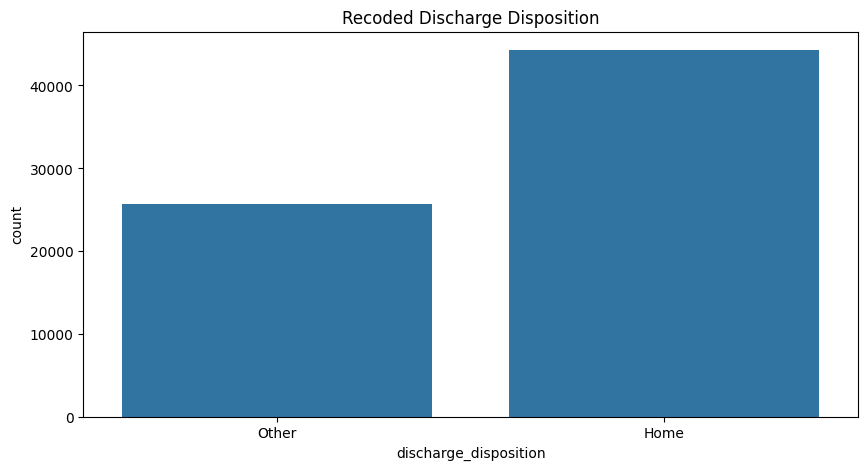

In [28]:
# Plotting

plt.figure(figsize=(10,5))
sns.countplot(x='discharge_disposition',data=df)
plt.title("Recoded Discharge Disposition")

#### Admission Type

There are 8 unique values for admission type. Similar categories were grouped together and subsequently recoded to 'Emergency', 'Elective', 'Newborn', and 'Other' for meaningful representation.

Text(0.5, 1.0, 'Admission Type')

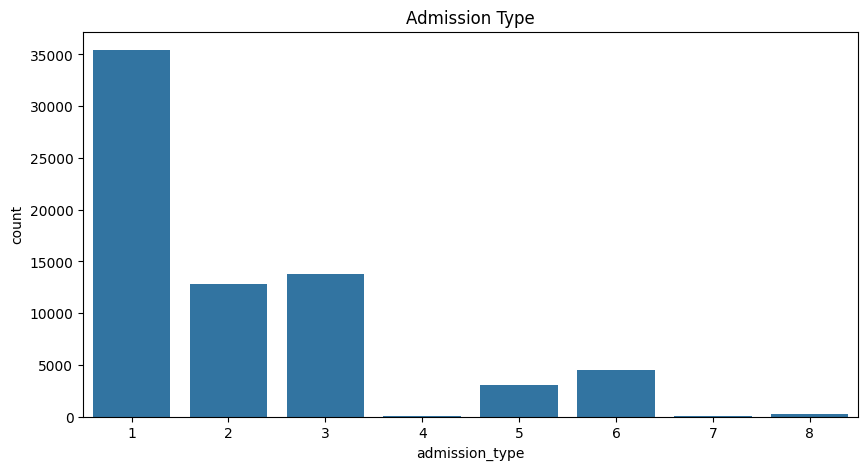

In [29]:
#plot Admission Type
df.rename(columns={'admission_type_id':'admission_type'},inplace=True)

#Change the type of admission to object
df['admission_type'] = df['admission_type'].astype('object')

plt.figure(figsize=(10,5))
sns.countplot(x= 'admission_type' ,data=df)
plt.title('Admission Type')

<ipython-input-30-f89eb01731c8>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission_type'].replace(2,1,inplace=True)
<ipython-input-30-f89eb01731c8>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['admission_type'].replace(2,1,inplace=True)


([<matplotlib.axis.XTick at 0x7ef13e470820>,
 [Text(0, 0, 'Emergency'),
  Text(1, 0, 'Elective'),
  Text(2, 0, 'Newborn'),
  Text(3, 0, 'Other')])

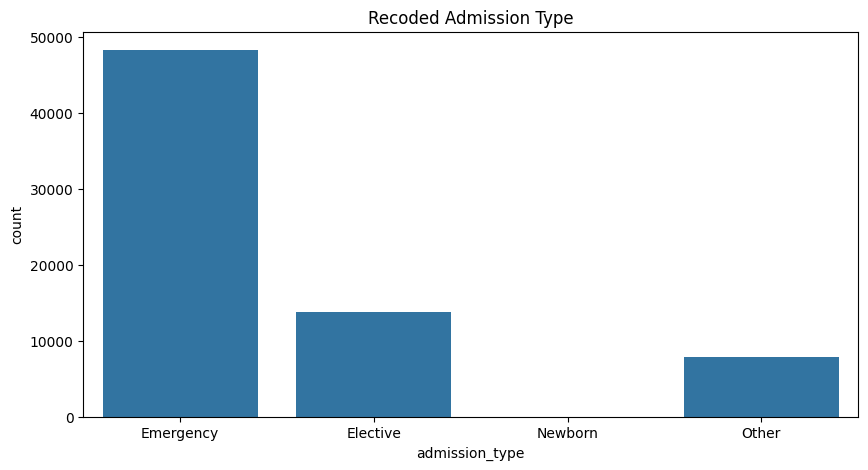

In [30]:
# Recoding Admission type
types = ['Emergency', 'Elective', 'Newborn','Other']
length = len(types)

df['admission_type'].replace(2,1,inplace=True)
df['admission_type'].replace(7,1,inplace=True)
df['admission_type'].replace(6,5,inplace=True)
df['admission_type'].replace(8,5,inplace=True)


plt.figure(figsize=(10,5))
sns.countplot(x= 'admission_type' ,data=df)
plt.title('Recoded Admission Type')
plt.xticks(ticks=np.arange(length),labels= types)

#### Admission Source

Admission source has 21 unique values. These were recoded to 'Physician Referral', 'Emergency Room' and 'Other'.

In [31]:
# Rename the admission source column
df.rename(columns={'admission_source_id':'admission_source'},inplace=True)


In [32]:
# Recoding
Phy_Ref = [1,2,3]
Other = [4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15,17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
Emer_Room = [7,16]
df['admission_source'].replace(Phy_Ref,'Physician Referral',inplace=True)
df['admission_source'].replace(Other,'Other',inplace=True)
df['admission_source'].replace(Emer_Room,'Emergency Room',inplace=True)


<ipython-input-32-715a02153260>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission_source'].replace(Phy_Ref,'Physician Referral',inplace=True)


Text(0.5, 1.0, 'Recoded Admission Source')

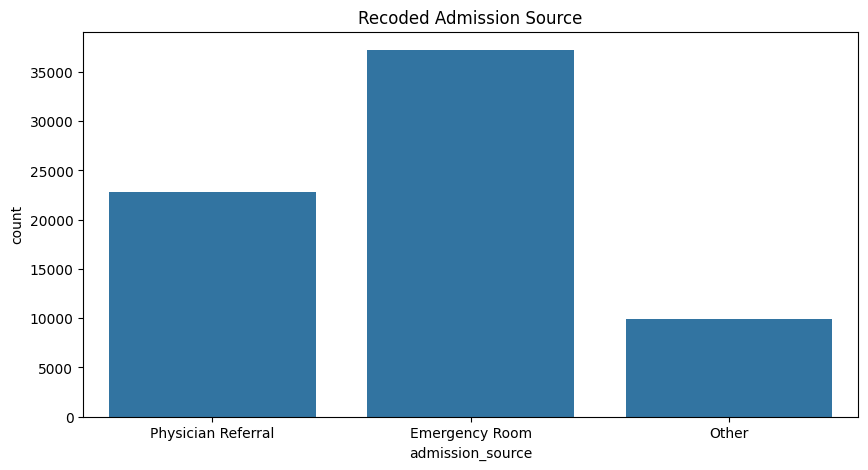

In [33]:
# Plot histogram

plt.figure(figsize=(10,5))
sns.countplot(x='admission_source',data=df)
plt.title('Recoded Admission Source')

In [34]:
# Checking the names and types of columns after recoding
df.dtypes

,0
race,object
gender,object
age,object
admission_type,int64
discharge_disposition,object
admission_source,object
time_in_hospital,int64
num_lab_procedures,int64
num_procedures,int64
num_medications,int64


### 2.4.2 Categorization

#### 2.4.2.1 Diagnoses

In 'diag_1' column, there is a total of 695 unique values, which are the ICD-9 codes representing different types of diseases. It would be difficult to interpret them meaningfully if all unique codes were included.

Hence, the ICD-9 codes were collapsed into their respective disease categories according to the ICD-9 guidelines, which can be obtained by accessing the following link: https://www.cdc.gov/nchs/icd/icd9cm_addenda_guidelines.htm

Note: Diabetes is separated from the rest of the endocrine diseases category. Furthermore, disease categories reporting less than 3% of total instances and the 21 missing diag_1 instances will be combined with "symptoms, signs, and ill-defined conditions" as "others".

In [35]:
#Checking the number of unique values in 'diag_1'

print(len(df['diag_1'].unique()))

695


In [36]:
# Fill NA values with an empty string or another suitable placeholder
df['diag_1'] = df['diag_1'].fillna('')

# Replace ICD codes with the first 3 digits
df['diag_1'] = df['diag_1'].str.split('.').str.get(0)

# Function for categorization
def map_icd(icd):
    if icd == '':
        return 'others'
    elif icd.startswith('E') or icd.startswith('V'):
        return 'others' #"external causes of injury and supplemental classification"
    elif int(icd) == 250:
        return 'diabetes mellitus'
    elif int(icd) == 782:
        return 'others' #'skin'
    elif int(icd) == 785:
        return 'circulatory'
    elif int(icd) == 786:
        return 'respiratory'
    elif int(icd) == 787:
        return 'digestive'
    elif int(icd) == 788:
        return 'genitourinary'
    elif int(icd) <= 139:
        return 'others' #'infectious and parasitic diseases'
    elif int(icd) <= 239:
        return 'neoplasms'
    elif int(icd) <= 279:
        return 'others' #'endocrine, nutritional and metabolic diseases, and immunity disorders'
    elif int(icd) <= 289:
        return 'others' #'blood and blood-forming organs diseases'
    elif int(icd) <= 319:
        return 'others' #'mental disorders'
    elif int(icd) <= 389:
        return 'others' #'nervous system and sense organs diseases'
    elif int(icd) <= 459:
        return 'circulatory'
    elif int(icd) <= 519:
        return 'respiratory'
    elif int(icd) <= 579:
        return 'digestive'
    elif int(icd) <= 629:
        return 'genitourinary'
    elif int(icd) <= 679:
        return 'others' #'complications of pregnancy, childbirth, and the puerperium'
    elif int(icd) <= 709:
        return 'others' #'skin'
    elif int(icd) <= 739:
        return 'musculoskeletal'
    elif int(icd) <= 759:
        return 'others' #'congenital anomalies'
    elif int(icd) <= 779:
        return  'others'#'certain conditions originating in the perinatal period'
    elif int(icd) <= 799:
        return 'others' #'symptoms, signs, and ill-defined conditions'
    elif int(icd) <= 999:
        return 'injury'

# Apply the mapping function to the 'diag' column
df['diag_1'] = df['diag_1'].apply(map_icd)

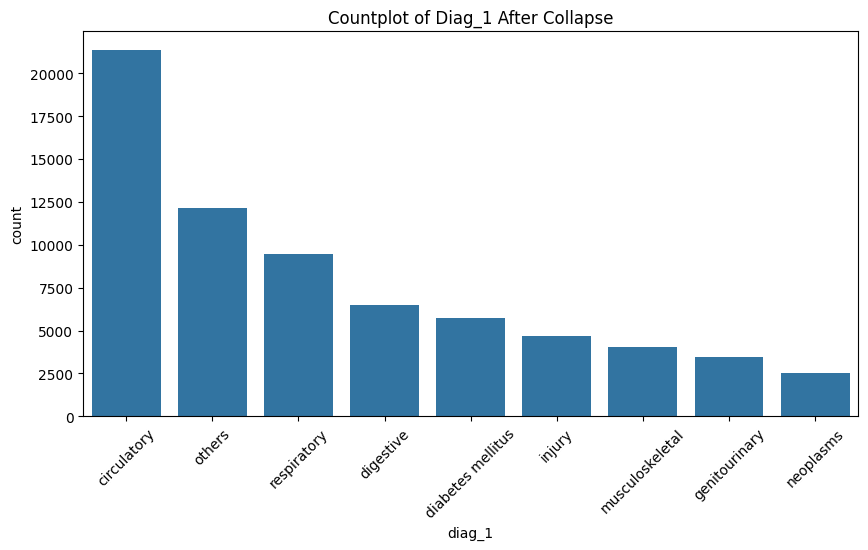

In [37]:
sorted_categories = df['diag_1'].value_counts().index

# Create the countplot with sorted categories
plt.figure(figsize=(10,5))
sns.countplot(x='diag_1', data=df, order=sorted_categories)
plt.title('Countplot of Diag_1 After Collapse')
plt.xticks(rotation=45)
plt.show()

#### 2.4.2.1 Readmission

The existing classes in the 'readmitted' column are 'NO', '>30', and '<30'. To reflect the objective of this project, these values are replaced by '0' and '1', which represent 'no readmission within 30 days' and 'readmission within 30 days'. Furthermore, the 'readmitted' column is renamed to 'readmission_in_30days'.

In [38]:
# Replacing the existing values with binary values
df['readmitted'] = df['readmitted'].replace('NO','0')
df['readmitted'] = df['readmitted'].replace('>30','0')
df['readmitted'] = df['readmitted'].replace('<30','1')

# Renaming the column
df.rename(columns={'readmitted': 'readmission_in_30days'}, inplace=True)

### 2.4.3 Data Encoding
The features in the dataset are encoded by using mapping method. This method allow the new dataset formed in least dimension. These encoded features were used in the subsequent stages.

In [39]:
# Form a function to list out unique value for each feature.
def list_unique_values(dataframe):
    for column in dataframe.columns:
        unique_values = dataframe[column].unique()
        print(f" '{column}': {unique_values}")

list_unique_values(df)

 'race': ['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']
 'gender': ['Female' 'Male']
 'age': ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
 'admission_type': [5 1 3 4]
 'discharge_disposition': ['Other' 'Home']
 'admission_source': ['Physician Referral' 'Emergency Room' 'Other']
 'time_in_hospital': [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
 'num_lab_procedures': [ 41  59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29
  35  42  66  36  19  64  25  53  52  87  27  37  28  48  10   2  65  67
  40  54  58  57  43  32  83  34  39  69  38  72  22  96  46  78  56  61
  88  50   1  18  82   9  63  24  71  77  81  76  90  93   3 103  13  80
  85  16  15  12  30  23  17  21  79  26  95  97  84  14  74 105  86  98
  20   5   6   8   7  89  91  94  92   4 101 102  99 100 114 111 107 108
 106 104 109 120 113 132 121 118]
 'num_procedures': [0 5 1 6 2 3 4]
 'num_medications': [ 1 18 13 16  8 21 12 28 17 11 15 31

In [40]:
# Define mappings for each categorical column
mappings = {
    'race': {value: idx for idx, value in enumerate(['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic'])},
    'gender': {value: idx for idx, value in enumerate(['Female', 'Male'])},
    'age': {value: idx for idx, value in enumerate(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)'])},
    'admission_type': {value: idx for idx, value in enumerate([5, 1, 3, 4])},
    'discharge_disposition': {value: idx for idx, value in enumerate(['Other', 'Home'])},
    'admission_source': {value: idx for idx, value in enumerate(['Physician Referral', 'Emergency Room', 'Other'])},
    'diag_1': {value: idx for idx, value in enumerate(['diabetes mellitus', 'others', 'neoplasms', 'circulatory', 'respiratory', 'injury', 'musculoskeletal', 'digestive', 'genitourinary'])},
    'max_glu_serum': {value: idx for idx, value in enumerate(['None', '>300', 'Norm', '>200'])},
    'A1Cresult': {value: idx for idx, value in enumerate(['None', '>7', '>8', 'Norm'])},
    'metformin': {value: idx for idx, value in enumerate(['No', 'Steady', 'Up', 'Down'])},
    'glimepiride': {value: idx for idx, value in enumerate(['No', 'Steady', 'Down', 'Up'])},
    'glipizide': {value: idx for idx, value in enumerate(['No', 'Steady', 'Up', 'Down'])},
    'glyburide': {value: idx for idx, value in enumerate(['No', 'Steady', 'Up', 'Down'])},
    'pioglitazone': {value: idx for idx, value in enumerate(['No', 'Steady', 'Up', 'Down'])},
    'rosiglitazone': {value: idx for idx, value in enumerate(['No', 'Steady', 'Up', 'Down'])},
    'insulin': {value: idx for idx, value in enumerate(['No', 'Up', 'Steady', 'Down'])},
    'change': {value: idx for idx, value in enumerate(['No', 'Ch'])},
    'diabetesMed': {value: idx for idx, value in enumerate(['No', 'Yes'])},
    'readmission_in_30days': {value: idx for idx, value in enumerate(['0', '1'])}
}

df_ready = df.copy()

for column, mapping in mappings.items():
    df_ready[column] = df_ready[column].map(mapping)

# Print the updated DataFrame to verify the changes
print(df_ready.head())

   race  gender  age  admission_type  discharge_disposition  admission_source  \
0     0       0    0               0                      0                 0   
1     0       0    1               1                      1                 1   
2     1       0    2               1                      1                 1   
3     0       1    3               1                      1                 1   
4     0       1    4               1                      1                 1   

   time_in_hospital  num_lab_procedures  num_procedures  num_medications  ...  \
0                 1                  41               0                1  ...   
1                 3                  59               0               18  ...   
2                 2                  11               5               13  ...   
3                 2                  44               1               16  ...   
4                 1                  51               0                8  ...   

   metformin  glimepiride 

In [41]:
# The ready dataset has 27 featues and 69924 rows of data
df_ready.shape

(69924, 27)

#3.0 Exploratory Data Analysis


## Univariate Analysis
Count plots and box plots were constructed for each categorical and numerical variable respectively to have a overview of the variables.

In [42]:
df_ready.dtypes

,0
race,int64
gender,int64
age,int64
admission_type,int64
discharge_disposition,int64
admission_source,int64
time_in_hospital,int64
num_lab_procedures,int64
num_procedures,int64
num_medications,int64


## 3.1 Countplot


<ipython-input-43-4a9e6591c682>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-43-4a9e6591c682>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-43-4a9e6591c682>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-43-4a9e6591c682>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-43-4a9e6591c682>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e.

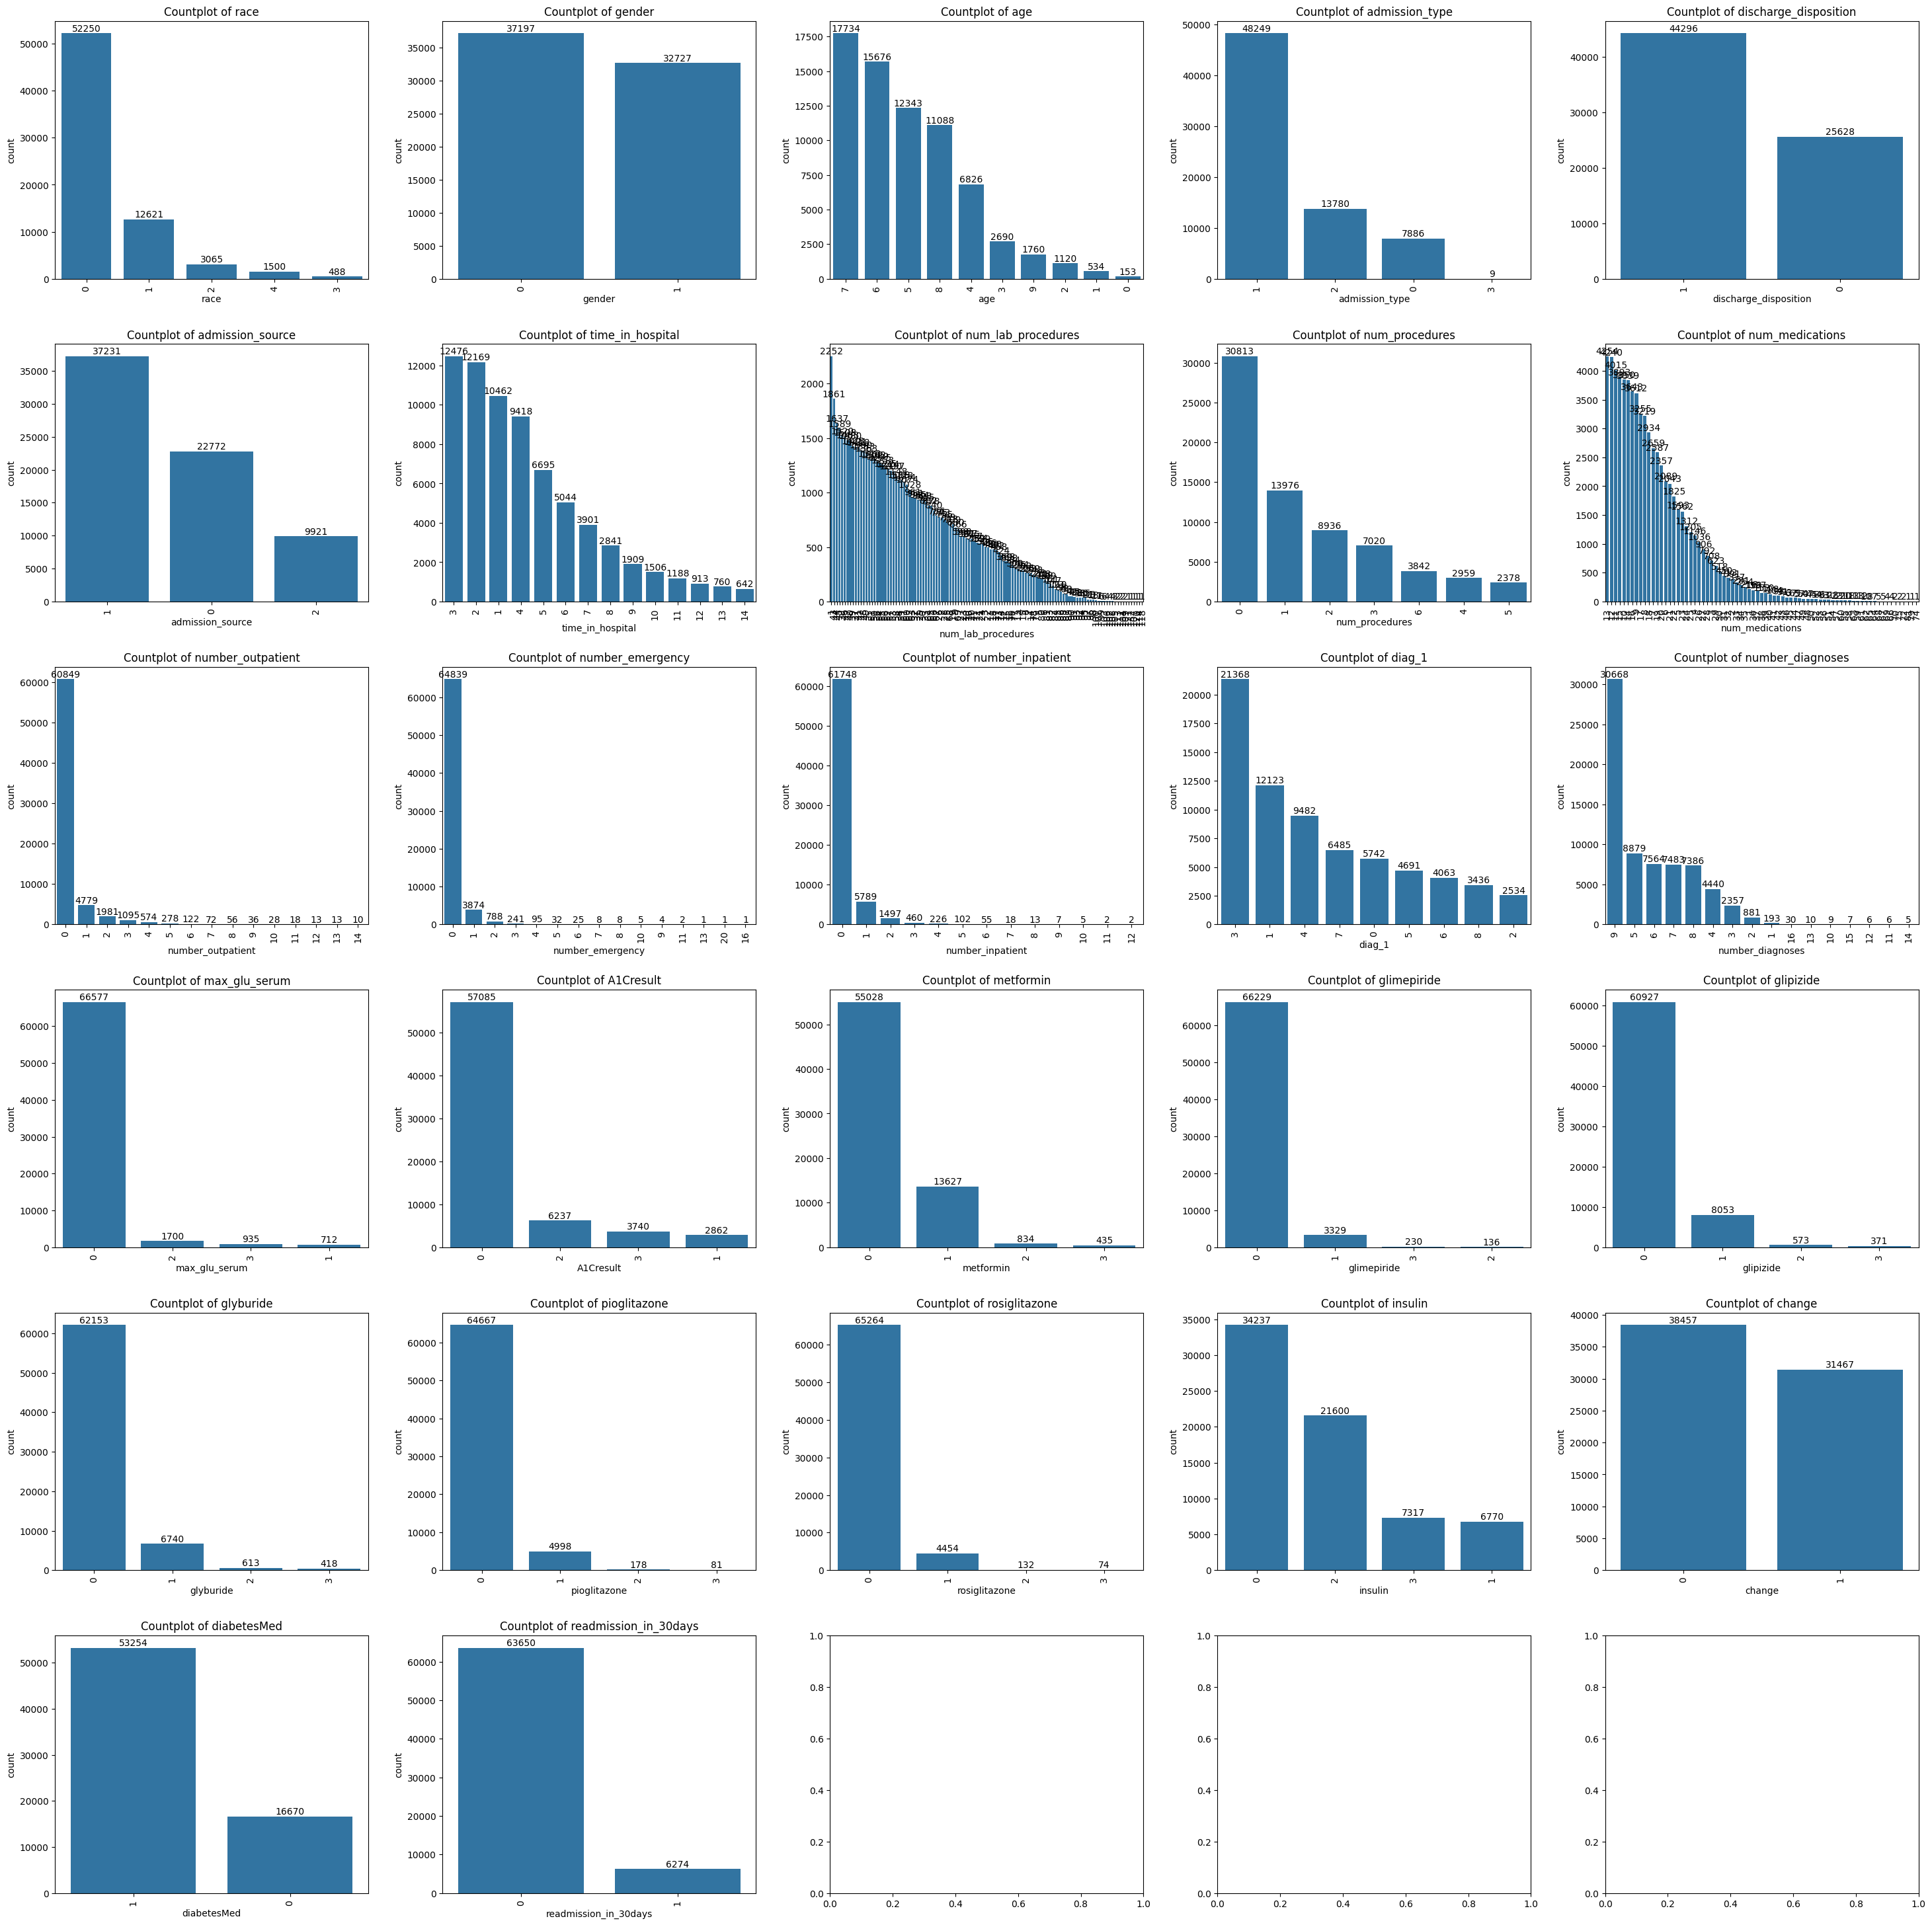

In [43]:
# Columns name
cols = df_ready.columns

fig, axes = plt.subplots(6, 5, figsize=(30,30))
fig.tight_layout(pad=5.0)

for ax, feature in zip(axes.flatten(), cols):
    # Sort the value counts
    value_counts_sorted = df_ready[feature].value_counts().sort_values(ascending=False)

    sns.countplot(x=feature, data=df_ready, order=value_counts_sorted.index, ax=ax)
    ax.set_title(f'Countplot of {feature}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    # Add value labels
    for i, count in enumerate(value_counts_sorted):
        ax.text(i, count, str(count), ha='center', va='bottom')

plt.savefig('Countplot_feature.png')
plt.show()

## 3.2 Boxplot

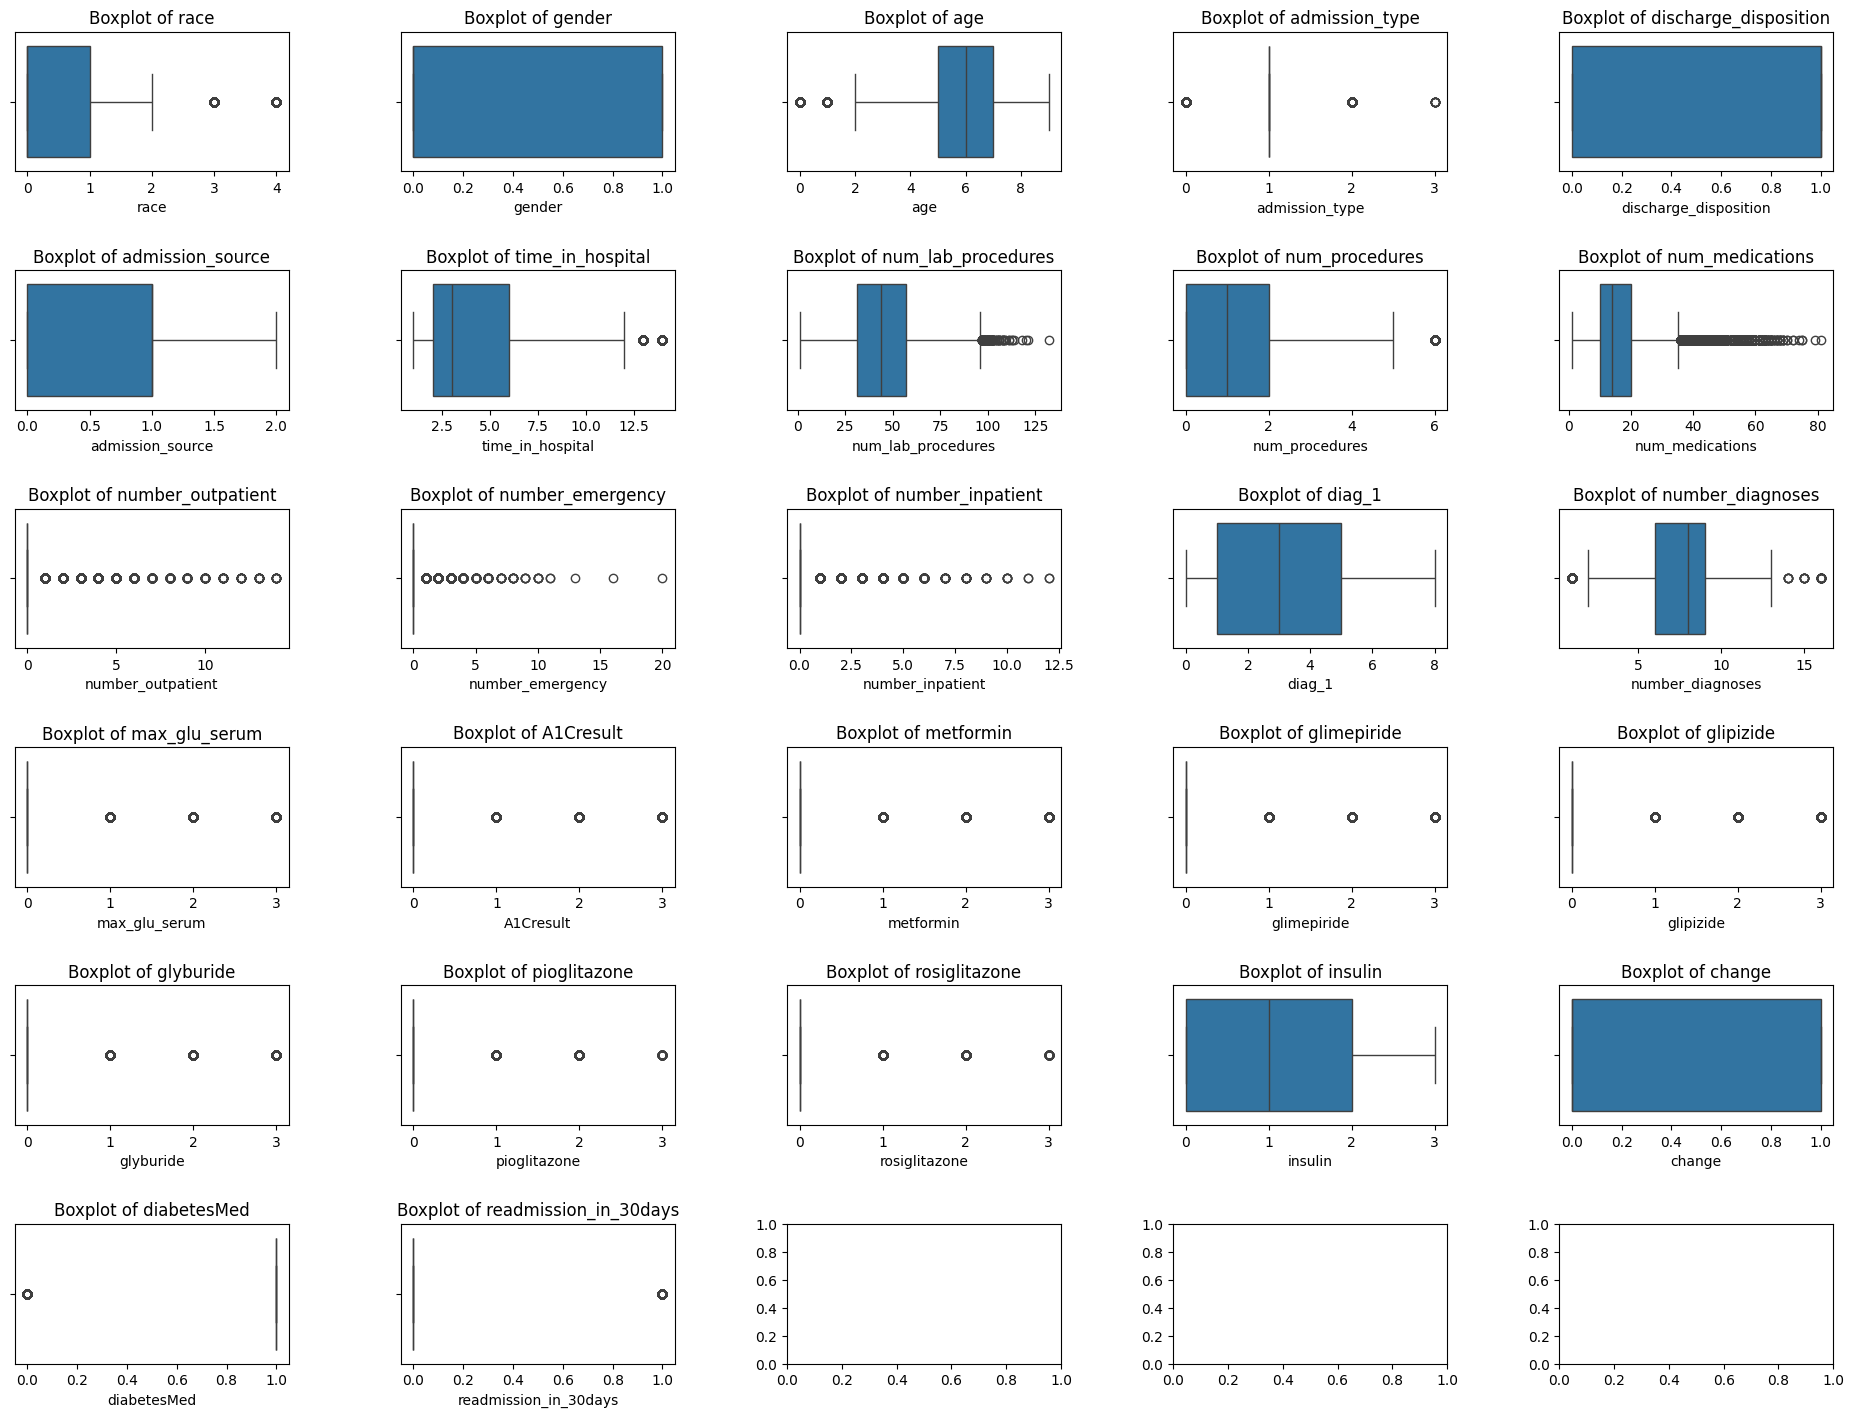

In [44]:
fig, axes = plt.subplots(6,5, figsize=(20, 15))
fig.tight_layout(pad=5.0)

for ax, feature in zip(axes.flatten(), cols):
    sns.boxplot(x=feature, data=df_ready, ax=ax)
    ax.set_title(f'Boxplot of {feature}')

plt.savefig('Boxplot_feature.png')
plt.show()

## 3.3 Heatmap

Heatmaps based on Spearman Correlation was plotted to measure linear correlations between variables. This is due to spearman correlation can handle ordinal data, not sensitivity to outlier and suitable for non-linear relationship of features.

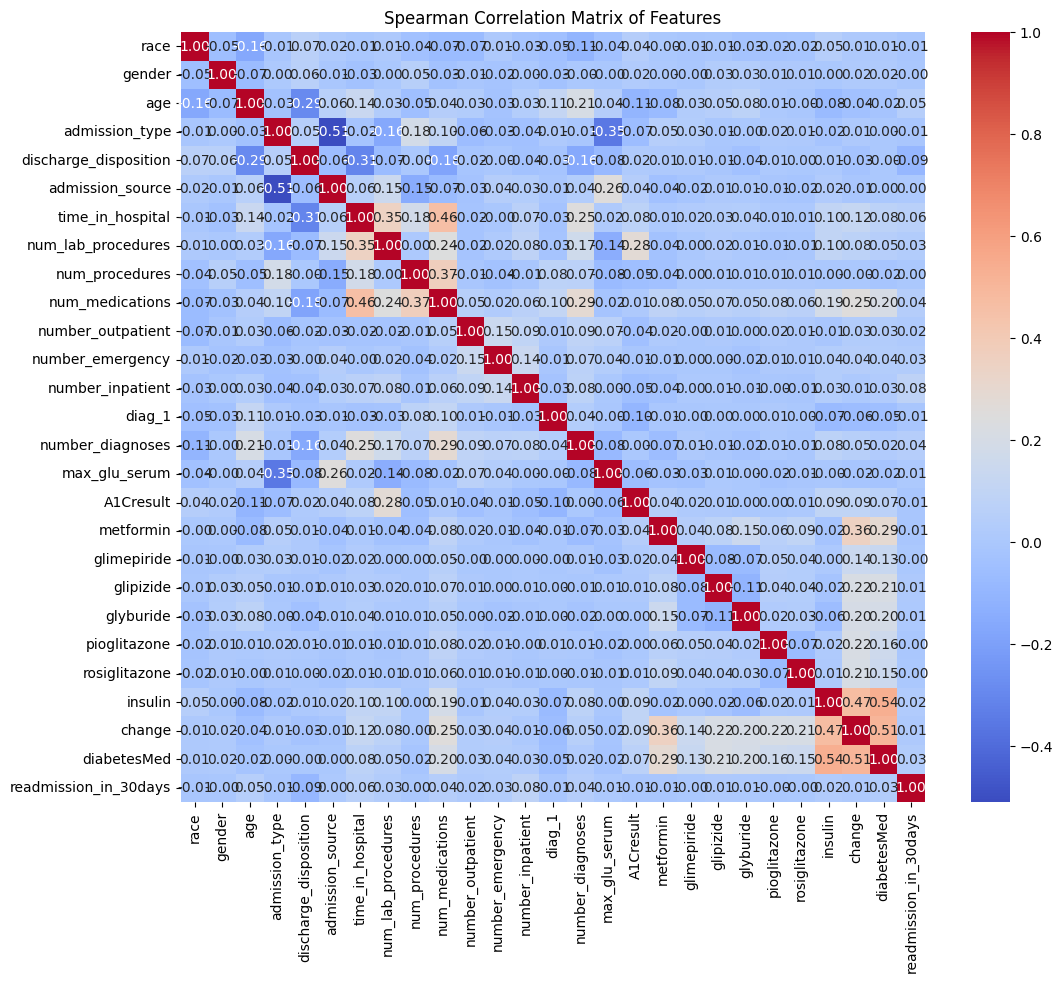

In [45]:
# Compute the Spearman correlation matrix
spearman_corr_matrix = df_ready[cols].corr(method='spearman')

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Spearman Correlation Matrix of Features')
plt.xticks(rotation=90)

plt.savefig('heatmap.png')
plt.show()

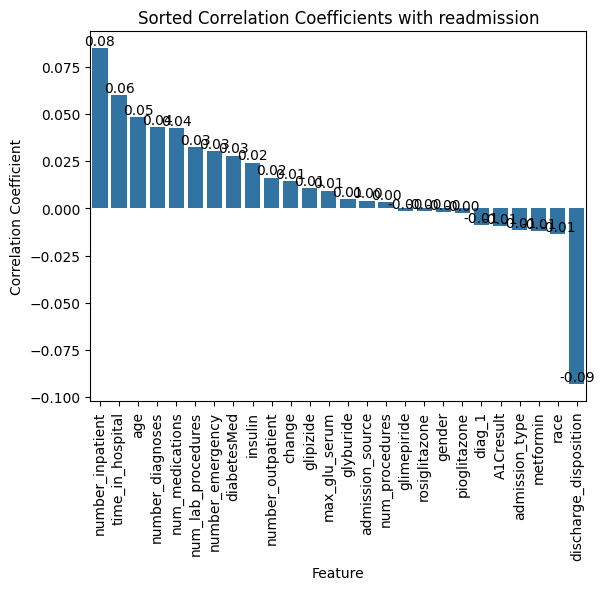

In [46]:
# Select the last row to check
last_row = spearman_corr_matrix.iloc[-1]

# Sort the values of the last row
sorted_last_row = last_row.sort_values(ascending=False)
sorted_last_row = sorted_last_row[1:] #Remove the readmission feature

ax = sns.barplot(x=sorted_last_row.index, y=sorted_last_row.values)

# Loop through data and add text labels
for i, (index, value) in enumerate(sorted_last_row.items()):
    bar = ax.containers[0][i]
    x_pos = bar.get_x() + bar.get_width() / 2
    y_pos = value
    # Add text with appropriate formatting and alignment
    plt.text(x_pos, y_pos, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

plt.xlabel('Feature')
plt.ylabel('Correlation Coefficient')
plt.title('Sorted Correlation Coefficients with readmission')
plt.xticks(rotation=90)


# Display the countplot
plt.show()



### 3.3.1 Feature Selection

In [47]:
sorted_last_row = sorted_last_row[(sorted_last_row > 0.009) | (sorted_last_row < -0.009)]
sorted_last_row

,readmission_in_30days
number_inpatient,0.084764
time_in_hospital,0.059919
age,0.048322
number_diagnoses,0.042978
num_medications,0.042681
num_lab_procedures,0.032494
number_emergency,0.030458
diabetesMed,0.027919
insulin,0.024249
number_outpatient,0.016284


The bar chart shows the correlation with readmission which is higher than 0.01.
A total of 18 features are selected.

In [48]:
df_ready2 = df_ready[sorted_last_row.index]
df_ready2['readmission_in_30days'] = df_ready['readmission_in_30days']
df_ready = df_ready2

df_ready.shape

<ipython-input-48-b9e2f2c00e6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ready2['readmission_in_30days'] = df_ready['readmission_in_30days']


(69924, 19)

## 3.4 Bivariate Analysis

Variables that have high correlation with readmission were further investigated in this section.

Based on result in proportion analysis, the highest readmission age group is 80-90 group. From 3.4.2 to 3.4.5, the charts are related with usage of medication and changes of medication dosage. The patients who on medication and medication dosage changes have the higher probability readmit to hospital.

### 3.4.1 Charts for age

<ipython-input-49-63be6c83c645>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xtick_labels)


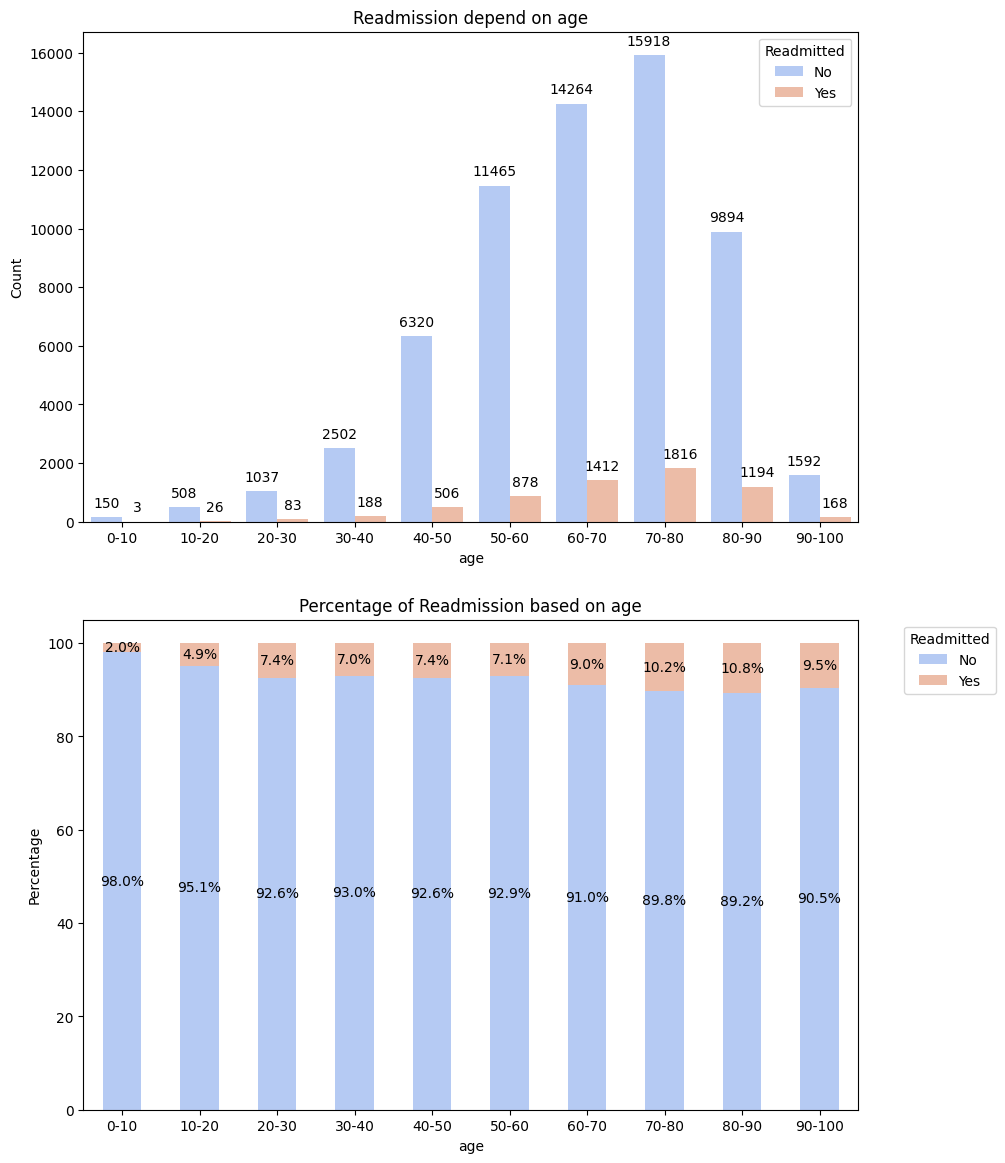

In [49]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 14))

# First plot: Count plot
ax1 = sns.countplot(x='age', hue='readmission_in_30days', data=df_ready, palette='coolwarm', ax=ax1)
ax1.set_title('Readmission depend on age')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, ['No', 'Yes'], title='Readmitted')
xtick_labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
plt.xticks(rotation=45)
ax1.set_xticklabels(xtick_labels)
ax1.set_ylabel('Count')

# Second plot: Stacked bar plot with percentages
# Create a DataFrame with counts
count_df = df_ready.groupby(['age','readmission_in_30days']).size().unstack(fill_value=0)

# Calculate percentages
percent_df = count_df.div(count_df.sum(axis=1), axis=0) * 100

# Plot stacked bar plot
percent_df.plot(kind='bar', stacked=True, ax=ax2, color=["#b5caf3","#ecbca7",])
ax2.set_title('Percentage of Readmission based on age')
ax2.set_ylabel('Percentage')
ax2.legend(title='Readmitted', labels=['No', 'Yes'])
ax2.set_xticklabels(xtick_labels)
plt.xticks(rotation=0)

ax2.legend(title='Readmitted', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1), loc='upper left')

#Annotate each bar
for p in ax1.patches:
    height = int(p.get_height())
    if height > 0:
        ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax2.annotate(f'{height:.1f}%', (x + width / 2., y + height / 2.), ha='center', va='center', color='black')

### 3.4.2 Charts for diabetes medication

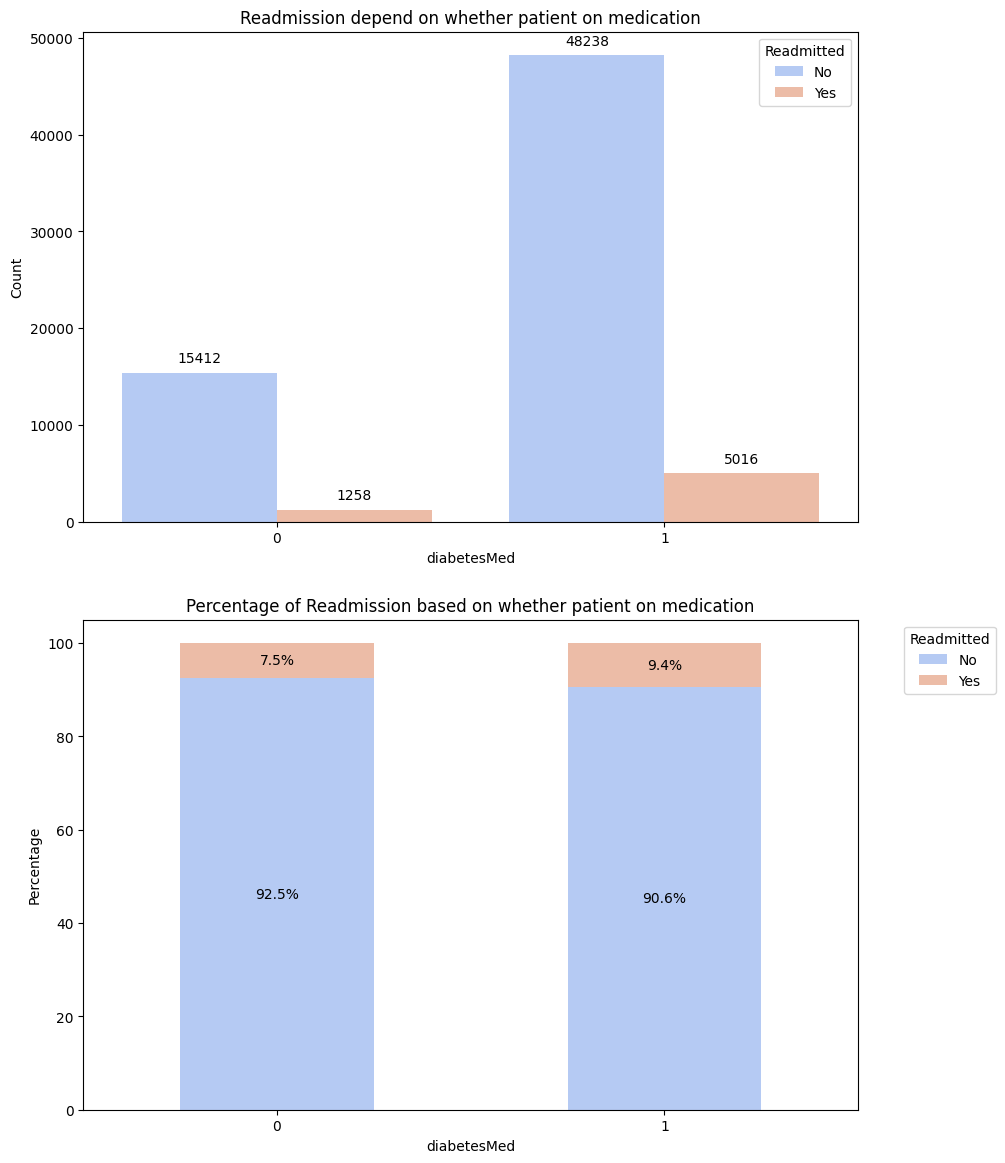

In [50]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 14))

# First plot: Count plot
ax1 = sns.countplot(x='diabetesMed', hue='readmission_in_30days', data=df_ready, palette='coolwarm',ax=ax1)
ax1.set_title(f'Readmission depend on whether patient on medication')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, ['No', 'Yes'], title='Readmitted')
plt.xticks(rotation=45)
ax1.set_ylabel('Count')

# Second plot: Stacked bar plot with percentages
# Create a DataFrame with counts
count_df = df_ready.groupby(['diabetesMed', 'readmission_in_30days']).size().unstack(fill_value=0)

# Calculate percentages
percent_df = count_df.div(count_df.sum(axis=1), axis=0) * 100

# Plot stacked bar plot
percent_df.plot(kind='bar', stacked=True, ax=ax2, color=["#b5caf3","#ecbca7",])
ax2.set_title(f'Percentage of Readmission based on whether patient on medication')
ax2.set_ylabel('Percentage')
ax2.legend(title='Readmitted', labels=['No', 'Yes'])
plt.xticks(rotation=0)

ax2.legend(title='Readmitted', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1), loc='upper left')


#Annotate each bar
for p in ax1.patches:
    height = int(p.get_height())
    if height > 0:
        ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


# Annotate each bar
for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax2.annotate(f'{height:.1f}%', (x + width / 2., y + height / 2.), ha='center', va='center', color='black')

### 3.4.3 Charts for insulin

<ipython-input-51-cbf107bf389e>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xtick_labels)


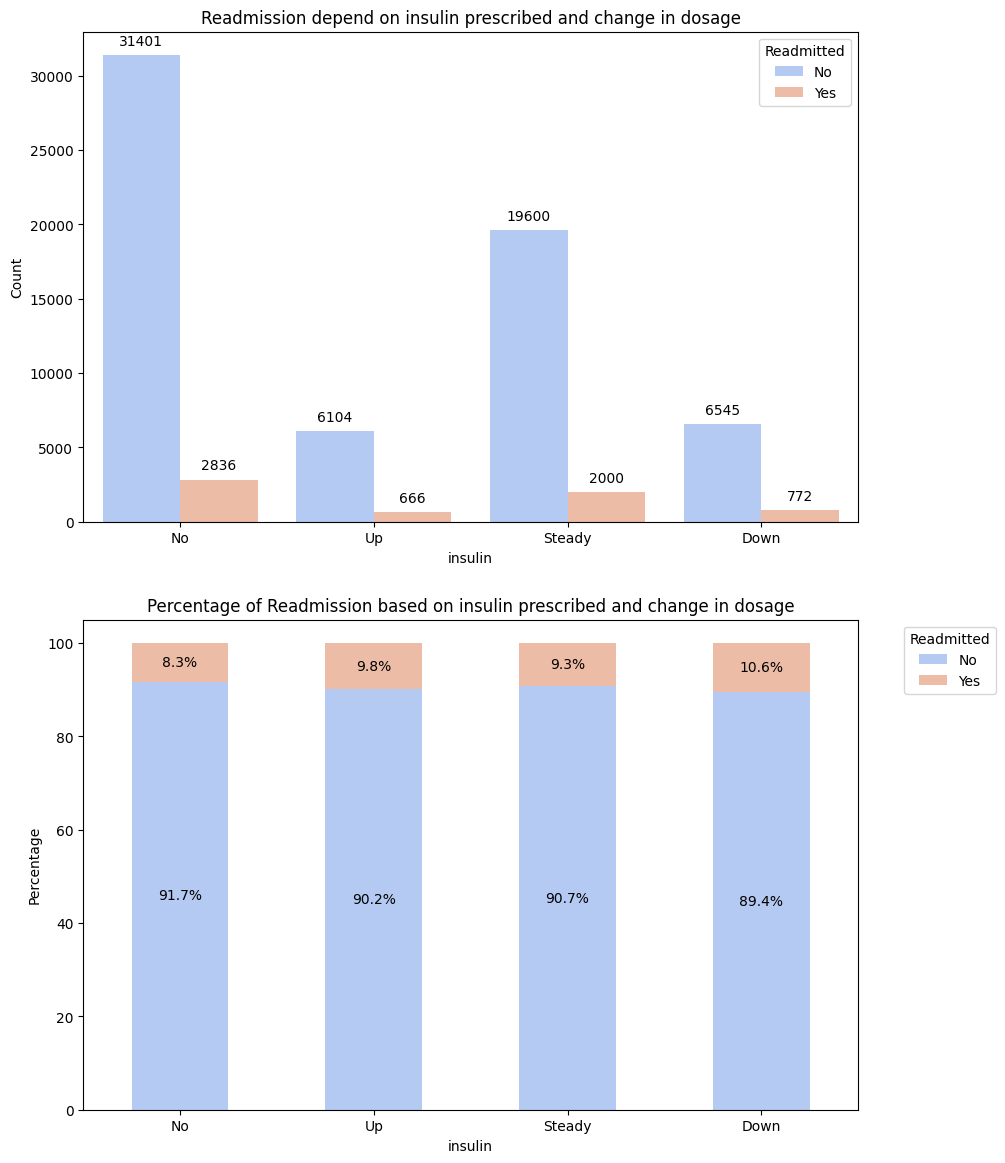

In [51]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 14))

# First plot: Count plot
ax1 = sns.countplot(x='insulin', hue='readmission_in_30days', data=df_ready, palette='coolwarm',ax=ax1)
ax1.set_title('Readmission depend on insulin prescribed and change in dosage')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, ['No', 'Yes'], title='Readmitted')
xtick_labels = ['No', 'Up', 'Steady', 'Down']
plt.xticks(rotation=45)
ax1.set_xticklabels(xtick_labels)
ax1.set_ylabel('Count')

# Second plot: Stacked bar plot with percentages
# Create a DataFrame with counts
count_df = df_ready.groupby(['insulin','readmission_in_30days']).size().unstack(fill_value=0)

# Calculate percentages
percent_df = count_df.div(count_df.sum(axis=1), axis=0) * 100

# Plot stacked bar plot
percent_df.plot(kind='bar', stacked=True, ax=ax2, color=["#b5caf3","#ecbca7",])
ax2.set_title('Percentage of Readmission based on insulin prescribed and change in dosage')
ax2.set_ylabel('Percentage')
ax2.legend(title='Readmitted', labels=['No', 'Yes'])
plt.xticks(rotation=0)
ax2.set_xticklabels(xtick_labels)

ax2.legend(title='Readmitted', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1), loc='upper left')


#Annotate each bar
for p in ax1.patches:
    height = int(p.get_height())
    if height > 0:
        ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


# Annotate each bar
for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax2.annotate(f'{height:.1f}%', (x + width / 2., y + height / 2.), ha='center', va='center', color='black')

### 3.4.4 Charts for change in medication

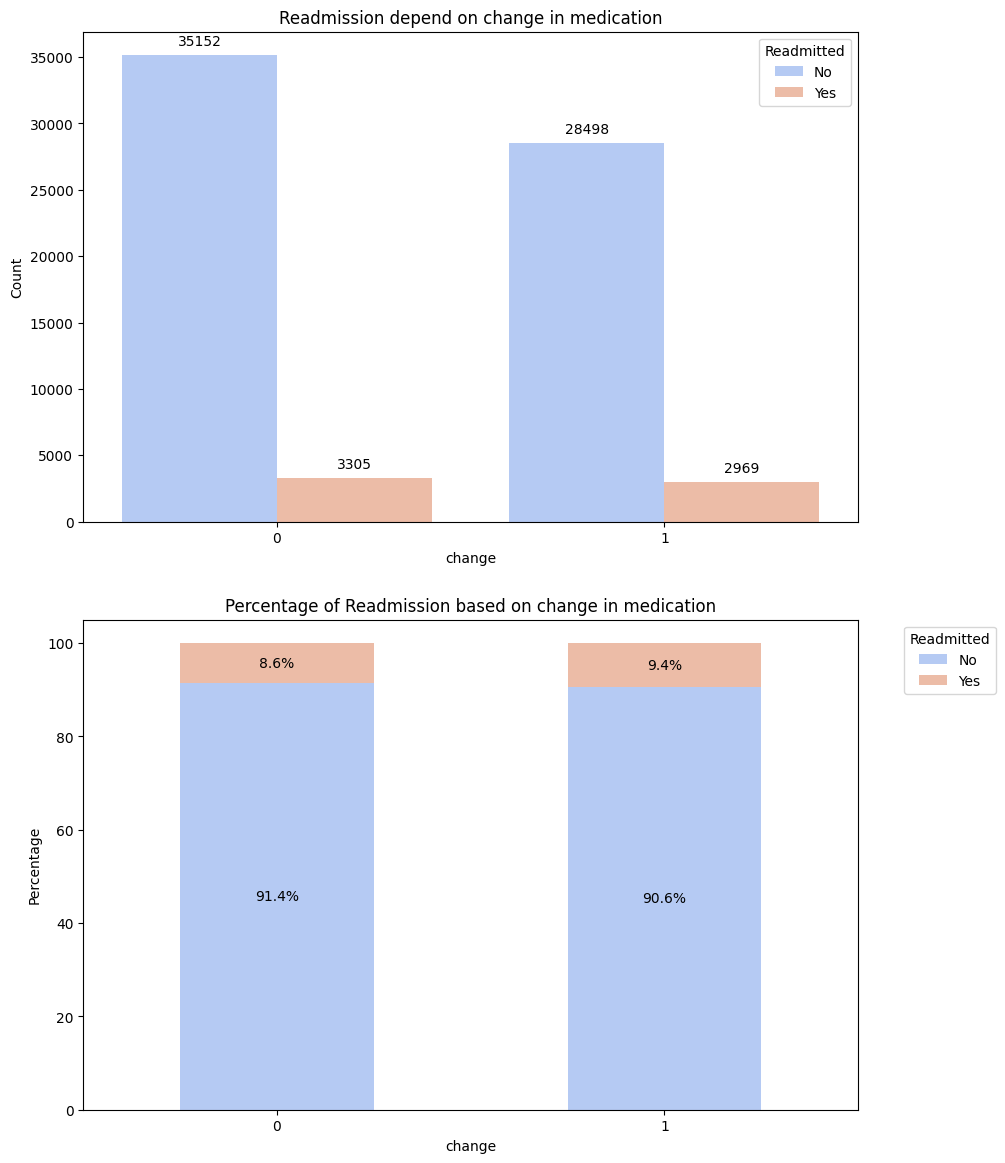

In [52]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 14))

# First plot: Count plot
ax1 = sns.countplot(x='change', hue='readmission_in_30days', data=df_ready, palette='coolwarm',ax=ax1)
ax1.set_title('Readmission depend on change in medication')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, ['No', 'Yes'], title='Readmitted')
plt.xticks(rotation=45)
ax1.set_ylabel('Count')

# Second plot: Stacked bar plot with percentages
# Create a DataFrame with counts
count_df = df_ready.groupby(['change','readmission_in_30days']).size().unstack(fill_value=0)

# Calculate percentages
percent_df = count_df.div(count_df.sum(axis=1), axis=0) * 100

# Plot stacked bar plot
percent_df.plot(kind='bar', stacked=True, ax=ax2, color=["#b5caf3","#ecbca7",])
ax2.set_title('Percentage of Readmission based on change in medication')
ax2.set_ylabel('Percentage')
ax2.legend(title='Readmitted', labels=['No', 'Yes'])
plt.xticks(rotation=0)


ax2.legend(title='Readmitted', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1), loc='upper left')


#Annotate each bar
for p in ax1.patches:
    height = int(p.get_height())
    if height > 0:
        ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


# Annotate each bar
for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax2.annotate(f'{height:.1f}%', (x + width / 2., y + height / 2.), ha='center', va='center', color='black')

### 3.4.5 Charts for glipizide usage

<ipython-input-53-9f3a3c6ba4d9>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(xtick_labels)


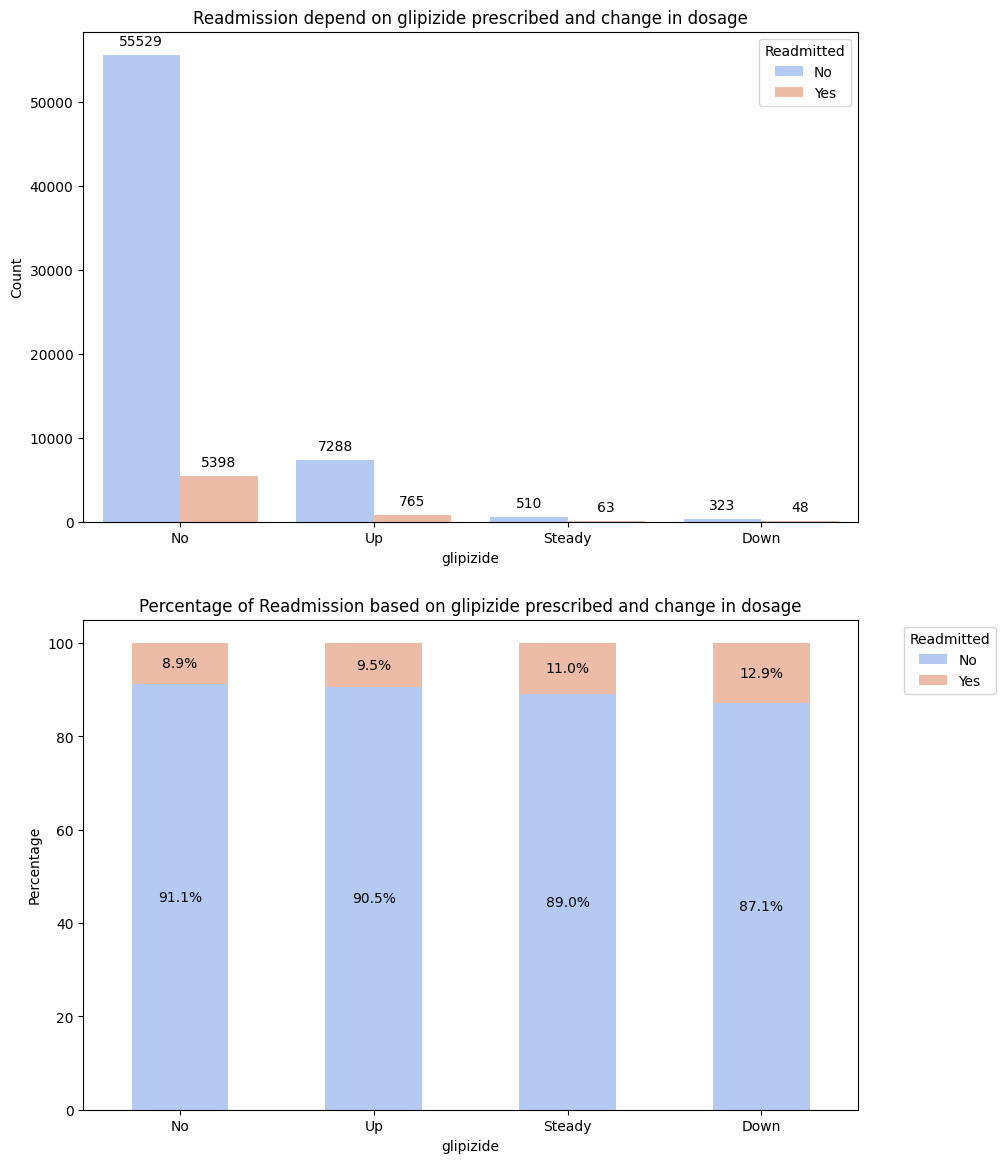

In [53]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 14))

# First plot: Count plot
ax1 = sns.countplot(x='glipizide', hue='readmission_in_30days', data=df_ready, palette='coolwarm',ax=ax1)
ax1.set_title('Readmission depend on glipizide prescribed and change in dosage')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, ['No', 'Yes'], title='Readmitted')
xtick_labels = ['No', 'Up', 'Steady', 'Down']
plt.xticks(rotation=45)
ax1.set_xticklabels(xtick_labels)
ax1.set_ylabel('Count')

# Second plot: Stacked bar plot with percentages
# Create a DataFrame with counts
count_df = df_ready.groupby(['glipizide','readmission_in_30days']).size().unstack(fill_value=0)

# Calculate percentages
percent_df = count_df.div(count_df.sum(axis=1), axis=0) * 100

# Plot stacked bar plot
percent_df.plot(kind='bar', stacked=True, ax=ax2, color=["#b5caf3","#ecbca7",])
ax2.set_title('Percentage of Readmission based on glipizide prescribed and change in dosage')
ax2.set_ylabel('Percentage')
ax2.legend(title='Readmitted', labels=['No', 'Yes'])

plt.xticks( rotation=0)
ax2.set_xticklabels(xtick_labels)

ax2.legend(title='Readmitted', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1), loc='upper left')


#Annotate each bar
for p in ax1.patches:
    height = int(p.get_height())
    if height > 0:
        ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


# Annotate each bar
for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax2.annotate(f'{height:.1f}%', (x + width / 2., y + height / 2.), ha='center', va='center', color='black')

### 3.4.6 Histogram charts

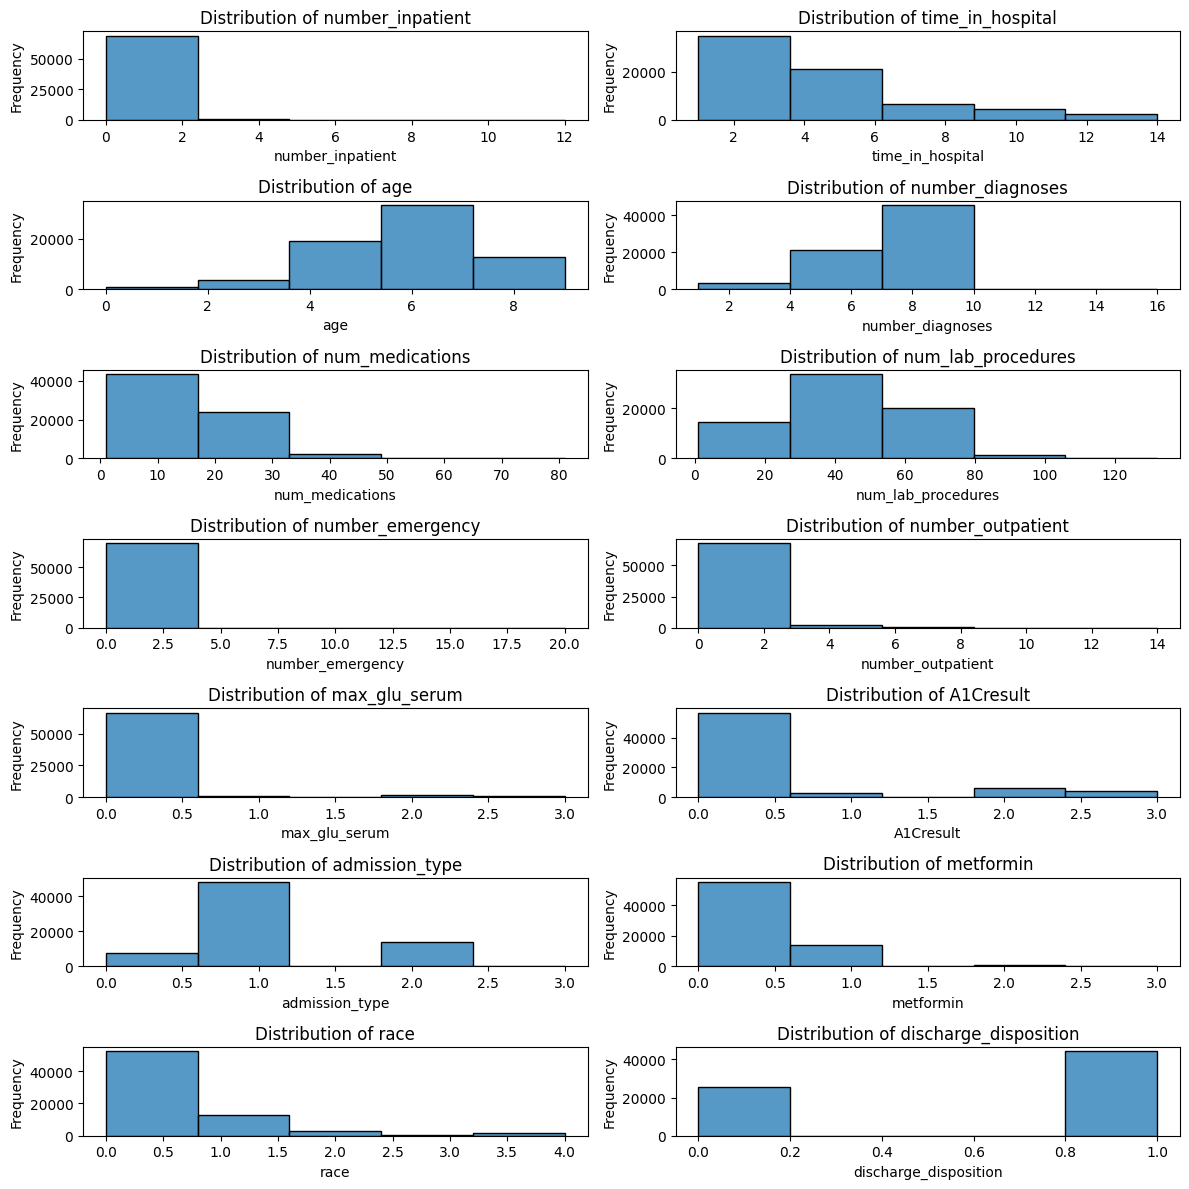

In [54]:
cols = ['number_inpatient','time_in_hospital','age','number_diagnoses','num_medications','num_lab_procedures','number_emergency',
        'number_outpatient','max_glu_serum','A1Cresult','admission_type','metformin','race','discharge_disposition']

# Create a subplot grid
plt.figure(figsize=(12, 12))  # Adjust as needed for multiple plots

# Loop through numerical columns and create histograms
for i, col_name in enumerate(cols):
    plt.subplot(7, 2, i+1)
    plt.tight_layout(pad=4.0, w_pad=4.0)
    sns.histplot(data=df_ready, x=col_name, bins=5, edgecolor='black')
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col_name}")
    plt.tight_layout()

plt.savefig('Histogram.png')

# 4.0 Modeling

## 4.1 Test Design


In [55]:
#package installation
!pip install numpy pandas scikit-learn catboost xgboost lightgbm scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 7.6 MB/s eta 0:00:00


In [56]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, confusion_matrix, precision_recall_curve, make_scorer
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from skopt import BayesSearchCV
from skopt.space import Integer, Real, Categorical
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from scipy.stats import uniform, randint

In [57]:
# Set the seed for reproducibility
seed = 123

In [58]:
X = df_ready2.drop('readmission_in_30days', axis=1)
y = df_ready2['readmission_in_30days']
print(X)
print(y)

        number_inpatient  time_in_hospital  age  number_diagnoses  \
0                      0                 1    0                 1   
1                      0                 3    1                 9   
2                      1                 2    2                 6   
3                      0                 2    3                 7   
4                      0                 1    4                 5   
...                  ...               ...  ...               ...   
101754                 0                 9    7                 9   
101755                 0                14    4                 9   
101756                 1                 2    6                 9   
101758                 0                 5    8                 9   
101765                 0                 6    7                 9   

        num_medications  num_lab_procedures  number_emergency  diabetesMed  \
0                     1                  41                 0            0   
1              

In [59]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)


## 4.2 Model Training

### 4.2.1 Stratified K-fold Cross-Validation


In [60]:
# Define stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

### 4.2.2 Evaluation Metric Function


In [61]:
# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculating the confusion matrix to derive specificity
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

    # AUC-PR calculation
    precision_pr, recall_pr, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc_pr = auc(recall_pr, precision_pr)

    return accuracy, precision, recall, f1, auc_pr, specificity

# Custom scorer for AUC-PR
def auc_pr_scorer(y_true, y_proba):
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    return auc(recall, precision)

scorer = make_scorer(auc_pr_scorer, needs_proba=True)

### 4.2.3 Hyperparamter Tuning & Synthetic Minority Over-sampling TEchnique (SMOTE)



In [62]:
# Define hyperparameter tuning methods
# Random Search Tuning
def random_search_tuning(model, param_dist, X_train, y_train):
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=20,
                                       scoring=scorer, cv=skf, random_state=seed,
                                       n_jobs=-1, error_score='raise')
    random_search.fit(X_train, y_train)
    return random_search.best_estimator_

# Grid Search Tuning
def grid_search_tuning(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid=param_grid, scoring=scorer, cv=skf,
                               n_jobs=-1, error_score='raise')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Bayesian Optimization Tuning
def bayesian_optimization_tuning(model, search_spaces, X_train, y_train):
    bayes_search = BayesSearchCV(model, search_spaces=search_spaces, n_iter=10,
                                 scoring=scorer, cv=skf, random_state=seed,
                                 n_jobs=-1, error_score='raise')
    bayes_search.fit(X_train, y_train)
    return bayes_search.best_estimator_

In [63]:
# Initialize models
catboost_model = CatBoostClassifier(verbose=0, random_seed=seed)
xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=seed)
lightgbm_model = LGBMClassifier(random_state=seed)

In [64]:
# Apply SMOTE in a pipeline to handle imbalance
smote = SMOTE(random_state=seed)

catboost_pipeline = Pipeline([('smote', smote), ('classifier', catboost_model)])
xgboost_pipeline = Pipeline([('smote', smote), ('classifier', xgboost_model)])
lightgbm_pipeline = Pipeline([('smote', smote), ('classifier', lightgbm_model)])


#### Random Search Tuning
* For Random Search, we'll use distributions to sample parameter values randomly.

In [65]:
# Random Search parameter distributions
catboost_random_param_space = {
    'classifier__iterations': randint(10, 1000),
    'classifier__learning_rate': uniform(0.01, 0.3),
    'classifier__depth': randint(4, 10),
    'classifier__l2_leaf_reg': uniform(1, 10),
    'classifier__border_count': randint(1, 255),
    'classifier__scale_pos_weight': [1, 5, 10]
}

xgboost_random_param_space = {
    'classifier__max_depth': randint(3, 10),
    'classifier__learning_rate': uniform(0.01, 0.3),
    'classifier__n_estimators': randint(50, 1000),
    'classifier__min_child_weight': randint(1, 10),
    'classifier__gamma': uniform(0, 0.5),
    'classifier__subsample': uniform(0.5, 0.5),
    'classifier__colsample_bytree': uniform(0.5, 0.5),
    'classifier__scale_pos_weight': [1, 5, 10]
}

lightgbm_random_param_space = {
    'classifier__max_depth': randint(3, 10),
    'classifier__learning_rate': uniform(0.01, 0.3),
    'classifier__n_estimators': randint(50, 1000),
    'classifier__num_leaves': randint(20, 50),
    'classifier__min_child_samples': randint(10, 100),
    'classifier__subsample': uniform(0.5, 0.5),
    'classifier__colsample_bytree': uniform(0.5, 0.5),
    'classifier__reg_alpha': uniform(0, 1),
    'classifier__reg_lambda': uniform(0, 1),
    'classifier__scale_pos_weight': [1, 5, 10]
}

In [ ]:
catboost_random = random_search_tuning(catboost_pipeline, catboost_random_param_space, X_train, y_train)
#30mins

In [72]:
xgboost_random = random_search_tuning(xgboost_pipeline, xgboost_random_param_space, X_train, y_train)
#8mins

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will

TypeError: auc_pr_scorer() got an unexpected keyword argument 'needs_proba'

In [66]:
lightgbm_random = random_search_tuning(lightgbm_pipeline, lightgbm_random_param_space, X_train, y_train)
#7mins

TypeError: auc_pr_scorer() got an unexpected keyword argument 'needs_proba'

#### Grid Search Tuning (Example, refine based on Random Search results)
* For Grid Search, we'll define discrete sets of parameter values.

In [73]:
# Grid Search parameter grids
catboost_grid_param_space = {
    'classifier__iterations': [200, 500],  # Keeping both values to test different iterations
    'classifier__learning_rate': [0.01, 0.1],  # Keeping both values for learning rate
    'classifier__depth': [4, 6],  # Keeping both values for depth
    'classifier__l2_leaf_reg': [1, 5],  # Keeping both values for L2 regularization
    'classifier__border_count': [32],  # Reduced to one value
    'classifier__scale_pos_weight': [1, 5]  # Keeping both values for class imbalance
}

xgboost_grid_param_space = {
    'classifier__max_depth': [3, 6],  # Keeping both values for depth
    'classifier__learning_rate': [0.01, 0.1],  # Keeping both values for learning rate
    'classifier__n_estimators': [500],  # Reduced to one value
    'classifier__min_child_weight': [1, 5],  # Keeping both values for minimum child weight
    'classifier__gamma': [0],  # Reduced to one value
    'classifier__subsample': [0.75, 1.0],  # Keeping both values for subsample
    'classifier__colsample_bytree': [0.75],  # Reduced to one value
    'classifier__scale_pos_weight': [1, 5]  # Keeping both values for class imbalance
}

lightgbm_grid_param_space = {
    'classifier__max_depth': [4, 5, 6],
    'classifier__learning_rate': [0.05, 0.1, 0.2],
    'classifier__n_estimators': [200, 500],
    'classifier__num_leaves': [15, 31, 50, 75, 100], # Adjust num_leaves parameter
    'classifier__class_weight': ['balanced', None]
}

In [ ]:
catboost_grid = grid_search_tuning(catboost_pipeline, catboost_grid_param_space, X_train, y_train)
#30mins

In [74]:
xgboost_grid = grid_search_tuning(xgboost_pipeline, xgboost_grid_param_space, X_train, y_train)
#10mins

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will

TypeError: auc_pr_scorer() got an unexpected keyword argument 'needs_proba'

In [ ]:
lightgbm_grid = grid_search_tuning(model=lightgbm_pipeline, param_grid=lightgbm_grid_param_space, X_train=X_train, y_train=y_train)
#54mins

[LightGBM] [Info] Number of positive: 50920, number of negative: 50920
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 101840, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


#### Bayesian Optimization Tuning

In [ ]:
# Bayesian Optimization parameter spaces
catboost_bayesian_param_space = {
    'classifier__iterations': (100, 1000),
    'classifier__learning_rate': (0.01, 0.3),
    'classifier__depth': (4, 10),
    'classifier__l2_leaf_reg': (1, 10),
    'classifier__border_count': (1, 255),
    'classifier__scale_pos_weight': Categorical([1, 5, 10])
}

xgboost_bayesian_param_space = {
    'classifier__max_depth': Integer(3, 10),
    'classifier__learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'classifier__n_estimators': Integer(100, 1000),
    'classifier__min_child_weight': Integer(1, 10),
    'classifier__gamma': Real(0, 0.5),
    'classifier__subsample': Real(0.5, 1),
    'classifier__colsample_bytree': Real(0.5, 1),
    'classifier__scale_pos_weight': Categorical([1, 5, 10])
}

lightgbm_bayesian_param_space = {
    'classifier__max_depth': Integer(4, 10),
    'classifier__learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'classifier__n_estimators': Integer(100, 1000),
    'classifier__num_leaves': Integer(20, 150),
    'classifier__min_child_samples': Integer(10, 100),
    'classifier__subsample': Real(0.5, 1),
    'classifier__colsample_bytree': Real(0.5, 1),
    'classifier__reg_alpha': Real(0, 1),
    'classifier__reg_lambda': Real(0, 1),
    'classifier__scale_pos_weight': Categorical([1, 5, 10])
}

In [ ]:
catboost_bayes = bayesian_optimization_tuning(catboost_pipeline, catboost_bayesian_param_space, X_train, y_train)
#48mins

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 4 of parameter k1__k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 5 of parameter k1__k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: Conv

In [ ]:
xgboost_bayes = bayesian_optimization_tuning(xgboost_pipeline, xgboost_bayesian_param_space, X_train, y_train)
#19mins

In [ ]:
lightgbm_bayes = bayesian_optimization_tuning(lightgbm_pipeline, lightgbm_bayesian_param_space, X_train, y_train)
#11mins

[LightGBM] [Info] Number of positive: 50920, number of negative: 50920
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 101840, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

### 4.2.4 Model Evaluation

In [ ]:
# Evaluate all models
models = {
    'CatBoost Random Search': catboost_random,
    'XGBoost Random Search': xgboost_random,
    'LightGBM Random Search': lightgbm_random,
    'CatBoost Grid Search': catboost_grid,
    'XGBoost Grid Search': xgboost_grid,
    'LightGBM Grid Search': lightgbm_grid,
    'CatBoost Bayesian': catboost_bayes,
    'XGBoost Bayesian': xgboost_bayes,
    'LightGBM Bayesian': lightgbm_bayes
}

In [ ]:
# Collect evaluation results
results = {}
for name, model in models.items():
    accuracy, precision, recall, specificity, f1, auc_pr = evaluate_model(model, X_test, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'F1 Score': f1,
        'AUC PR': auc_pr
    }

In [ ]:
# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                        Accuracy  Precision    Recall  Specificity  F1 Score  \
CatBoost Random Search  0.362460   0.096832  0.733068     0.171067  0.102345   
XGBoost Random Search   0.228817   0.092874  0.866135     0.167760  0.103701   
LightGBM Random Search  0.232821   0.093460  0.867729     0.168746  0.103831   
CatBoost Grid Search    0.722917   0.120510  0.331474     0.176758  0.107577   
XGBoost Grid Search     0.658849   0.104944  0.372112     0.163716  0.104533   
LightGBM Grid Search    0.739006   0.103083  0.247809     0.145599  0.100294   
CatBoost Bayesian       0.195853   0.092237  0.900398     0.167333  0.103849   
XGBoost Bayesian        0.698820   0.114472  0.349801     0.172495  0.108057   
LightGBM Bayesian       0.491598   0.100014  0.583267     0.170749  0.100158   

                          AUC PR  
CatBoost Random Search  0.325923  
XGBoost Random Search   0.165986  
LightGBM Random Search  0.170228  
CatBoost Grid Search    0.761508  
XGBoost Grid Search     

### 4.2.5 Model Storing

In [ ]:
import pickle

# Store Training Results
with open('all_results.pkl', 'wb') as f:
    pickle.dump(results, f)

In [ ]:
import pickle
with open('all_results.pkl', 'rb') as f:
    # Load the object from the pickle file
    result_bk = pickle.load(f)

In [ ]:
result_bk = pd.DataFrame(result_bk).T
print(result_bk)

# 5.0 Result Evaluation & Interpretation

## **5.1 Model Evaluation Result**





**5.1.1 Model Evaluation Matrix**

|Name | Accuracy | Precision | Recall | Specificity | F1 Score | AUC PR |
|-----|-----|-----|-----|-----|-----|-----|
|CatBoost Random Search|  0.362460 |  0.096832|  0.733068  |   0.171067| 0.102345   | 0.325923
|XGBoost Random Search |  0.228817  | 0.092874 | 0.866135  |   0.167760 | 0.103701   | 0.165986  
|LightGBM Random Search|  0.232821 |  0.093460 | 0.867729  |  0.168746 | 0.103831   |  0.761508 |
|CatBoost Grid Search |   0.722917 |  0.120510|  0.331474  |   0.176758|  0.107577  |   0.687117  |
|XGBoost Grid Search  |   0.658849 |  0.104944 | 0.372112  |   0.163716|  0.104533  |   0.687117  |
|LightGBM Grid Search  |  0.739006 |  0.103083 | 0.247809 |    0.145599| 0.100294   |0.787431  |
|CatBoost Bayesian   |    0.522846  | 0.103019 | 0.560159  |   0.174031 |  0.105896   | 0.519167 |
|XGBoost Bayesian  |      0.698820 |  0.114472 | 0.349801   | 0.172495 | 0.108057 |    0.733229 |
|LightGBM Bayesian  |     0.491598 |  0.100014  |0.583267  |   0.170749 | 0.100158   | 0.482561  |

                  


  
    
      
      
     

**5.1.2 Time taken to run each models**

|Name | Random Search | Grid Search | Bayesian |
|-----|-----|-----|-----|
|CatBoost |30 mins|30 mins|48 mins|
|XGBoost  |15 mins|19 mins|19 mins|
|LightGBM |26 mins|54 mins|11 mins|


## **5.2 Model Interpretation**
In summary, the interpretation of the data indicates that LightGBM Grid Search and CatBoost Grid Search  perform well in terms of accuracy, precision, recall, F1 Score, Specificity, and AUC PR for predicting diabetes readmission.

**WITH FEATURE SELECTION:**

Since correlation is important in predicting diabetes readmission using each model, we will proceed with our modeling data after running feature selections.

Based on the metrics, the best model with their respective characteristics are being chosen and stated out as follows:

*   Accuracy measures the proportion of correctly predicted instances. Among all the models, the highest accuracy is achieved by LightGBM grid search with a value of approximately 73.9%, followed by Catboost Grid Search with 72.3%.

*   Precision quantifies the accuracy of positive predictions, while CatBoost Grid Search shows the highest precision of 12.48% among all other models. This indicates it is suitable to be used for implications that prioritize minimizing false positive predictions.

*   Recall measures the proportion of actual positives that are correctly identified by the model. In our model, LightGBM Random Search has the higest recall with 86.0%, indicating its ability to capture higher proportion of true positive cases.

*   Specificity measures the proportion of true negative instances that are correctly identified by the model. In our project, all model has similar specificity value around 17%, indicating their ability to capture true negative cases are similar.

*   The F1 Score shows mixed performance across models and techniques by balancing precision and recall. After feature selection, CatBoost Grid Search was found having the highest F1 Score of 10.7%, indicating it is better in balancing between precision and recall.

*   AUC PR summarizes the trade-off between precision and recall across different threshold values. In this project, LightGBM Grid Search has the highest value around 78.7%, showing an average overall performance in prediciting diabetes readmission.

According to the comparison with feature selection of correlation, we can find that (CatBoost Grid Search) is the best model which have the highest ranking among all the metrics.

**COMPARING MODELING TIME**

The ranking of efficiency in data interpretation is as follows:

1. XGBoost (Most efficient)
2. LightGBM (Less efficient)
3. CatBoost (Least efficient)

|Name | Random Search | Grid Search | Bayesian |
|-----|-----|-----|-----|
|CatBoost |30 mins|30 mins|48 mins|
|XGBoost  |15 mins|19 mins|19 mins|
|LightGBM |26 mins|54 mins|11 mins|


# **6.0 Conclusion**



After consideration, the priorities for diabetes readmission are as follows:

1. AUC-PR - (It is important for measuring the overall performance level of a binary classification model, less priority as compared to precision and recall).

2. Accuracy - Including both positive (Predicted of readmission) or negative (Predicted of non-readmission) cases. Accurate prediction makes sense.

3. Recall - Identifying all positive instances is crucial. Missing hihg-risk patients can have serious consequences.

4. Precision - Would like to prevent false positive cases, where not required diabetes patients are coming for readmission.

5. Timing - The shorter the time span of modeling/ prediction, the better/ more preferable the model is.

6. Specificity

The metrics that are less important for us are as follows:

1. F1-Score - Not our priority as compared to precision and recall. (It is the harmonic mean of precision and recall).

---

**Conclusion:**

Due to the cost of errors varies and the possibilities of imbalanced classes, we priortize recall, precision, and timing.

Hence, we decide to have (CatBoost Grid Search) as our model for deployment since it has the highest precision and recall value, as well as taking the shortest time for computation, which fulfil all our priorities.


**Selected models:**

|Name | Accuracy | Precision | Recall | Specificity | F1 Score | AUC PR | Timing |
|-----|-----|-----|-----|-----|-----|-----|-----|
|LightGBM Grid Search  |  0.739006 |  0.103083 | 0.247809 |    0.145599| 0.100294   |0.787431  | 54 mins |
|CatBoost Grid Search |   0.722917 |  0.120510|  0.331474  |   0.176758|  0.107577  |   0.687117  | 30 mins |


# References

1. CDC. (2022, October 25). By the Numbers: Diabetes in America. Centers for Disease Control and Prevention. https://www.cdc.gov/diabetes/health-equity/diabetes-by-the-numbers.html
2. James, J., Tan, S., Stretton, B., Kovoor, J. G., Gupta, A. K., Gluck, S., Gilbert, T., Sharma, Y., & Bacchi, S. (2023). Why do we evaluate 30-day readmissions in general medicine? A historical perspective and contemporary data. Internal Medicine Journal, 53(6), 1070–1075. https://doi.org/10.1111/imj.16115
3. LaCalle, E., & Rabin, E. (2010). Frequent Users of Emergency Departments: The Myths, the Data, and the Policy Implications. Annals of Emergency Medicine, 56(1), 42–48. https://doi.org/10.1016/j.annemergmed.2010.01.032
4. Moradi, S., Sahebi, Z., Ebrahim Valojerdi, A., Rohani, F., & Ebrahimi, H. (2017). The association between the number of office visits and the control of cardiovascular risk factors in Iranian patients with type2 diabetes. PLOS ONE, 12(6), e0179190. https://doi.org/10.1371/journal.pone.0179190
5. Ong, K. L., Stafford, L. K., McLaughlin, S. A., Boyko, E. J., Vollset, S. E., Smith, A. E., Dalton, B. E., Duprey, J., Cruz, J. A., Hagins, H., Lindstedt, P. A., Aali, A., Abate, Y. H., Abate, M. D., Abbasian, M., Abbasi-Kangevari, Z., Abbasi-Kangevari, M., Abd ElHafeez, S., Abd-Rabu, R., … Vos, T. (2023). Global, regional, and national burden of diabetes from 1990 to 2021, with projections of prevalence to 2050: A systematic analysis for the Global Burden of Disease Study 2021. The Lancet, 402(10397), 203–234. https://doi.org/10.1016/S0140-6736(23)01301-6
6. Ostling, S., Wyckoff, J., Ciarkowski, S. L., Pai, C.-W., Choe, H. M., Bahl, V., & Gianchandani, R. (2017). The relationship between diabetes mellitus and 30-day readmission rates. Clinical Diabetes and Endocrinology, 3(1), 3. https://doi.org/10.1186/s40842-016-0040-x
7. Rubin, D. J., & Shah, A. A. (2021). Predicting and Preventing Acute Care Re-Utilization by Patients with Diabetes. Current Diabetes Reports, 21(9), 34. https://doi.org/10.1007/s11892-021-01402-7
8. Soh, J. G. S., Mukhopadhyay, A., Mohankumar, B., Quek, S. C., & Tai, B. C. (2023). Predictors of frequency of 1-year readmission in adult patients with diabetes. Scientific Reports, 13(1), 22389. https://doi.org/10.1038/s41598-023-47339-7
9. Ustulin, M., Woo, J., Woo, J., & Rhee, S. Y. (2018). Characteristics of frequent emergency department users with type 2 diabetes mellitus in Korea. Journal of Diabetes Investigation, 9(2), 430–437. https://doi.org/10.1111/jdi.12712
